# Geodatenverarbeitung (ETH Kurs) 2024
Im Folgenden wird das Skript zusammengefasst und der Quellcode präsentiert. Dabei wird nicht zwingend auf jede Einzelheit eingegangen.


Als Quellen, die verwendet wurden, dienten im Wesentlichen:
<ul>
<li>Diener, Michael (2015). Python Geospatial Analysis Cookbook. Packt Publishing.
<li>Garrard, Chris (2016): Geoprocessing with Python. Manning Publications.
<li>Westra, Erik (2016): Python Geospatial Development. Third Edition. Packt Publishing.
</ul>

Die im Folgenden verwendeten Geodaten werden hier kurz vorgestellt. Es handelt sich dabei um Gemeinden des Kantons Solothurn, die kostenlos bezogen werden können.
Es werden im Folgenden die Gemeinden (Vektordaten) und ein Luftbild (Rasterdaten) verwendet. In QGIS visualisiert präsentieren sich die Daten wie folgt:
<p>
<img src='datensolothurn.png'>


Kommandozeilenfunktionen mittels 

```
ogr2ogr
```
</p>


<p style="font-family:courier new;">ogr2ogr --help </p>

#Umwandlung eines MapInfo Datensatzes ins Format Esri Shape
<p style="font-family:courier new;">ogr2ogr -f "ESRI Shapefile" mydata.shp mydata.tab</p>
oder umgekehrt:
<p style="font-family:courier new;">ogr2ogr -f "MapInfo File" gemso.tab Gemeinden_Solothurn.shp</p>


etc.

Falls diese Befehle in Python selbst eingesetzt werden sollen, können sie mittels <p style="font-family:courier new;">os.system()<p> aufgerufen und ausgeführt werden:

<div style="font-family:courier new;">
import os

os.system('ogr2ogr -f "ESRI Shapefile" -t_srs "EPSG:4326" ../Daten/GEM_SO_WGS84.shp ../Daten/Gemeinden_Solothurn.shp -progress -overwrite')

path2ds = "../Daten/Gemeinden_Solothurn.shp"
path2tds = "../Daten/GEM_SO_WGS84.shp"

os.system('ogr2ogr -f "ESRI Shapefile" -t_srs "EPSG:4326" %s %s -progress -overwrite' %(path2tds,path2ds))    
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from osgeo import ogr


In [3]:

import os

os.system('ogr2ogr -f "ESRI Shapefile" -t_srs "EPSG:4326" ../Data/GEM_SO_WGS84.shp ../Data/Gemeinden_Solothurn.shp -progress -overwrite')

path2ds = "../Data/Gemeinden_Solothurn.shp"
path2tds = "../Data/GEM_SO_WGS84.shp"

os.system('ogr2ogr -f "ESRI Shapefile" -t_srs "EPSG:4326" %s %s -progress -overwrite' %(path2tds,path2ds))    


0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


0

Als erstes wollen wir einen bestehenden Datensatz laden. Dazu müssen die notwendigen Module - für die explizite Behandlung von Geodaten - in Python geladen werden. Dies geschieht wie gewohnt mit dem "import" Befehl unter Nennung des entsprechenden Namens des Moduls: z.B. "import ogr"

```
import os
import ogr
```

Danach können die geladenen Module angesprochen werden:

```
import os
import ogr

drv = ogr.GetDriverByName("ESRI Shapefile")
path2ds = "../Daten/Gemeinden_Solothurn.shp"
path2tds = "../Daten/GEM_SO_WGS84.shp"
datasource = drv.Open(path2ds)

```

In [4]:
import os 
from osgeo import ogr
drv = ogr.GetDriverByName("ESRI Shapefile") 
path2ds = "../Data/Gemeinden_Solothurn.shp" 
path2tds = "../Data/GEM_SO_WGS84.shp" 
datasource = drv.Open(path2ds)


### Umgang mit Vektordaten ###

Falls keine Fehler auftreten können nun die Methoden und Funktionen des entsprechenden Moduls aufgerufen werden - wie bspw. das Laden eines existierenden Datensatzes.



Öffnen der Daten:


```
drv = ogr.GetDriverByName("ESRI Shapefile")
path2ds = os.path.join("Daten", "Gemeinden_Solothurn.shp")
print(path2ds)

datasource = drv.Open(path2ds)

print(datasource)
```

In [5]:
#%%capture

drv = ogr.GetDriverByName("ESRI Shapefile")
path2ds = os.path.join("../Data", "Gemeinden_Solothurn.shp")
print(path2ds)

datasource = drv.Open(path2ds)

print(datasource)


../Data/Gemeinden_Solothurn.shp
<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x1233bfbd0> >


<p style="background-color:white;">Bestimmen der Anzahl Datensätze/Features/Records:


<p style="font-family:courier new;">
layer = datasource.GetLayer(0)
<br>
print(layer.GetName())

<p style="font-family:courier new;">    
numftrs = layer.GetFeatureCount()
<br>
print("Anzahl Gemeinden im Kanton Solothurn: %i" %numftrs)


In [6]:

layer = datasource.GetLayer(0)
print(layer.GetName())

numftrs = layer.GetFeatureCount()
print("Anzahl Gemeinden im Kanton Solothurn: %i" %numftrs)


Gemeinden_Solothurn
Anzahl Gemeinden im Kanton Solothurn: 109


Als nächstes werden die Anzahl Attribute und deren Namen ermittelt:

```
layer_def = layer.GetLayerDefn()
numatts = layer_def.GetFieldCount()
print("Anzahl Attribute: %d" %numatts)
```

In [7]:
layer_def = layer.GetLayerDefn()
numatts = layer_def.GetFieldCount()
print("Anzahl Attribute: %d" %numatts)


Anzahl Attribute: 11


Nachdem die Anzahl der Attribute bekannt ist, kann nun eine Schlaufe erstellt werden, mithilfe derer über alle Attribute iteriert wird und innerhalb welcher sowohl der Name des Attributs als auch dessen Typ ausgegeben werden:

```
for i in range(numatts):
    field_def = layer_def.GetFieldDefn(i)
    print(field_def.GetName())
    print("  ", field_def.GetType())
    print("    ", field_def.GetPrecision())

```

In [8]:
for i in range(numatts):
    field_def = layer_def.GetFieldDefn(i)
    print(field_def.GetName())
    print("  ", field_def.GetType())
    print("    ", field_def.GetPrecision())



name
   4
     0
gem_bfs
   12
     0
gmde_name
   4
     0
gmde_nr
   12
     0
bzrk_nr
   12
     0
eg_nr
   12
     0
plz
   12
     0
ktn_nr
   0
     0
new_date
   9
     0
archive_da
   9
     0
archive
   12
     0


```
for i in range(numatts):
    field_def = layer_def.GetFieldDefn(i)
    print("Attribut mit Bezeichnung <%s> vom Typ %s mit Präzision %s" \
          %(field_def.GetName(),field_def.GetType(),str(field_def.GetPrecision())))
```

In [9]:
for i in range(numatts):
    field_def = layer_def.GetFieldDefn(i)
    print("Attribut mit Bezeichnung <%s> vom Typ %s mit Präzision %s" \
          %(field_def.GetName(),field_def.GetType(),str(field_def.GetPrecision())))

Attribut mit Bezeichnung <name> vom Typ 4 mit Präzision 0
Attribut mit Bezeichnung <gem_bfs> vom Typ 12 mit Präzision 0
Attribut mit Bezeichnung <gmde_name> vom Typ 4 mit Präzision 0
Attribut mit Bezeichnung <gmde_nr> vom Typ 12 mit Präzision 0
Attribut mit Bezeichnung <bzrk_nr> vom Typ 12 mit Präzision 0
Attribut mit Bezeichnung <eg_nr> vom Typ 12 mit Präzision 0
Attribut mit Bezeichnung <plz> vom Typ 12 mit Präzision 0
Attribut mit Bezeichnung <ktn_nr> vom Typ 0 mit Präzision 0
Attribut mit Bezeichnung <new_date> vom Typ 9 mit Präzision 0
Attribut mit Bezeichnung <archive_da> vom Typ 9 mit Präzision 0
Attribut mit Bezeichnung <archive> vom Typ 12 mit Präzision 0


Als nächstes wird das Räumliche Bezugssystem der Ebene bestimmt. Dieses gilt für alle Datensätze und wird mit dem Befehl GetSpatialRef() ermittelt.

```
lname = layer.GetName()
spatialRef = layer.GetSpatialRef()
print("Layer <%s> hat folgendes Raeumliche Bezugssystem %s" % (lname, spatialRef))
```

In [10]:
lname = layer.GetName()
spatialRef = layer.GetSpatialRef()
print("Layer <%s> hat folgendes Raeumliche Bezugssystem %s" % (lname, spatialRef))


Layer <Gemeinden_Solothurn> hat folgendes Raeumliche Bezugssystem PROJCS["CH1903 / LV03",
    GEOGCS["CH1903",
        DATUM["CH1903",
            SPHEROID["Bessel 1841",6377397.155,299.1528128,
                AUTHORITY["EPSG","7004"]],
            AUTHORITY["EPSG","6149"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4149"]],
    PROJECTION["Hotine_Oblique_Mercator_Azimuth_Center"],
    PARAMETER["latitude_of_center",46.9524055555556],
    PARAMETER["longitude_of_center",7.43958333333333],
    PARAMETER["azimuth",90],
    PARAMETER["rectified_grid_angle",90],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",600000],
    PARAMETER["false_northing",200000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","21781"]]


Als letztes wird die räumliche Ausdehnung des Datensatzes bestimmt. Dh. es werden die minimalen und die maximalen Koordinatenwerte sowohl in vertikaler als auch in horizontaler Richtung (dh. x- und y-Richtung) bestimmt. Dazu dient die Funktion GetExtent(). Diese Funktion liefert vier Werte zurück: minX, maxX, minY und maxY.

```
extent = layer.GetExtent()
print('Ausdehnung:', extent)
```

In [11]:
extent = layer.GetExtent()
print('Ausdehnung:', extent)


Ausdehnung: (592560.389, 644759.038, 213702.99, 261329.631)


<b>AUFGABEN:</b>

<div class="burk">
Als kleine Aufgabe sollen die beiden Punkte ausgegeben werden, welche den minimalen und den maximalen Wert des Layer repräsentieren, dh. die Punkte unten links und oben rechts.

Lösung:
</div><i class="fa fa-lightbulb-o "></i>

In [12]:
print('Unten-links:', extent[0], extent[2])
print('Oben-rechts:', extent[1], extent[3])


Unten-links: 592560.389 213702.99
Oben-rechts: 644759.038 261329.631


<div class="burk">
Übung: Erstelle die vier Eckpunkte als CSV Datei und visualisiere diese Punkte in QGIS
    
Lösung:</div><i class="fa fa-lightbulb-o "></i>

In [13]:
mycsv = open("../Data/eckpunkte_gemso.csv","w")
#unten links
mycsv.write("%i,%i \n" %(extent[0], extent[2]))
#oben links
mycsv.write("%i,%i \n" %(extent[0], extent[3]))
#unten rechts
mycsv.write("%i,%i \n" %(extent[1], extent[2]))
#oben rechts
mycsv.write("%i,%i \n" %(extent[1], extent[3]))

mycsv.close()

<div class="burk">

Nach dieser ersten Einführung soll nun folgende Aufgabe selbständig bearbeitet werden:
Bestimme den Geometrietyp des Layers 

(Hinweis: Funktion <i style="font-family:courier new;">GetGeomType()</i>)</div><i class="fa fa-lightbulb-o "></i>

In [14]:
GeomType = layer.GetGeomType()
print("Geometrietyp: %s" %GeomType)

extent = layer.GetExtent()
print ("Ausdehnung:", extent)
print ("Oben-links:", extent[0], extent[3])
print ("Unten-rechts:", extent[1], extent[2])
clng=(extent[0]+extent[1])/2
clat=(extent[2]+extent[3])/2
print ("Centroid: ", clng,clat )


from osgeo import osr
source = osr.SpatialReference()
source.ImportFromEPSG(21781)

target = osr.SpatialReference()
target.ImportFromEPSG(4326)

transform = osr.CoordinateTransformation(source, target)

point = ogr.CreateGeometryFromWkt("POINT (%i %i)" %(clng, clat))
point.Transform(transform)

print (point.ExportToWkt())

Geometrietyp: 3
Ausdehnung: (592560.389, 644759.038, 213702.99, 261329.631)
Oben-links: 592560.389 261329.631
Unten-rechts: 644759.038 213702.99
Centroid:  618659.7135 237516.3105
POINT (47.2882717779473 7.68528287223414)


<div class="burk">
Nun kann noch veralgemeinert werden, welche Geometrietypen es alles gibt und diese sollen unterschieden werden:</div><i class="fa fa-lightbulb-o "></i>

In [15]:
GeomType = layer.GetGeomType()
if GeomType == 0:
    GeomTypeName = "Geometrie"
if GeomType == 1:
    GeomTypeName = "Punkt"
if GeomType == 2:
    GeomTypeName = "Linie"
if GeomType == 3:
    GeomTypeName = "Polygon"
if GeomType == 4:
    GeomTypeName = "Multipunkt"
if GeomType == 5:
    GeomTypeName = "Multilinie"
if GeomType == 6:
    GeomTypeName = "Multipolygon"
if GeomType == 100:
    GeomTypeName = "Keine Geometrie"

print ("Geometrietyp (%i): %s" %(GeomType, GeomTypeName))


Geometrietyp (3): Polygon


Die Ausgabe des Attributnamens einschliesslich des zugehörigen Attributwerts für das spezifizierte Objekt kann folgendermassen erfolgen:

```
i=0
feature = layer.GetFeature(i)

attributes = feature.items()
for attname,attwert in attributes.items():
    #print("%s: %s" %(attname,attwert))
    pass

geomtype = feature.GetGeometryRef()
gemname = feature.GetField('gmde_name')
print("Geometrie von %s: %s" %(gemname, geomtype))
```

In [16]:
i=0
feature = layer.GetFeature(i)

attributes = feature.items()
for attname,attwert in attributes.items():
    #print("%s: %s" %(attname,attwert))
    pass

geomtype = feature.GetGeometryRef()
gemname = feature.GetField('gmde_name')
print("Geometrie von %s: %s" %(gemname, geomtype))

Geometrie von Rohr: POLYGON ((637457.13 251335.3,637497.55 251351.17,637529.93 251377.62,637560.83 251410.93,637580.2 251436.84,637609.37 251463.17,637663.918 251485.577,637705.135 251502.026,637732.58 251519.99,637753.691 251545.803,637797.877 251548.517,637838.298 251565.741,637885.505 251597.27,637942.118 251607.482,637981.466 251614.493,638023.692 251629.063,638062.215 251640.08,638114.195 251642.951,638170.985 251645.29,638216.34 251646.978,638232.196 251686.412,638233.781 251690.621,638261.459 251766.067,638321.562 251759.468,638381.124 251792.649,638469.803 251841.989,638539.135 251846.992,638586.531 251854.883,638613.709 251859.138,638640.182 251854.926,638666.139 251860.646,638693.449 251853.804,638721.968 251847.566,638755.572 251832.481,638774.295 251826.662,638795.395 251825.939,638829.69 251825.454,638838.401 251822.304,638852.499 251819.098,638868.249 251815.913,638884.535 251814.978,638885.646 251817.089,638898.919 251811.574,638910.771 251803.81,638922.368 251797.015,63

```
i=0
feature = layer.GetFeature(i)

attributes = feature.items()
print("Attributwerte des %i. Datensatzes:" %(i+1))
for key,value in attributes.items():
    print("  %s = %s" % (key, value))
```

In [17]:
i=0
feature = layer.GetFeature(i)

attributes = feature.items()
print("Attributwerte des %i. Datensatzes:" %(i+1))
for key,value in attributes.items():
    print("  %s = %s" % (key, value))


Attributwerte des 1. Datensatzes:
  name = Rohr
  gem_bfs = 2498
  gmde_name = Rohr
  gmde_nr = 2498
  bzrk_nr = 1105
  eg_nr = 105
  plz = 4655
  ktn_nr = 11
  new_date = 2014/02/20
  archive_da = 9999/01/01
  archive = 0


<b>Ausgabe der Geometrie:</b><p>
Das Abrufen der Geometrieinformation ist etwas komplexer. Hier muss beachtet werden, dass je nach Geometrietyp die Ausgabe umfangreicher ist. Dh. es muss ein Weg gesucht werden, welcher die Ausgabe der Geometrie dahingehend universell macht, dass der Quellcode unabhängig vom Geometrietyp verwendet werden kann.
    

```
geometry = feature.GetGeometryRef()
print("Geometrietyp: %s" %geometry)
```

In [18]:
geometry = feature.GetGeometryRef()
print("Geometrietyp: %s" %geometry)


Geometrietyp: POLYGON ((637457.13 251335.3,637497.55 251351.17,637529.93 251377.62,637560.83 251410.93,637580.2 251436.84,637609.37 251463.17,637663.918 251485.577,637705.135 251502.026,637732.58 251519.99,637753.691 251545.803,637797.877 251548.517,637838.298 251565.741,637885.505 251597.27,637942.118 251607.482,637981.466 251614.493,638023.692 251629.063,638062.215 251640.08,638114.195 251642.951,638170.985 251645.29,638216.34 251646.978,638232.196 251686.412,638233.781 251690.621,638261.459 251766.067,638321.562 251759.468,638381.124 251792.649,638469.803 251841.989,638539.135 251846.992,638586.531 251854.883,638613.709 251859.138,638640.182 251854.926,638666.139 251860.646,638693.449 251853.804,638721.968 251847.566,638755.572 251832.481,638774.295 251826.662,638795.395 251825.939,638829.69 251825.454,638838.401 251822.304,638852.499 251819.098,638868.249 251815.913,638884.535 251814.978,638885.646 251817.089,638898.919 251811.574,638910.771 251803.81,638922.368 251797.015,638938.9

Das Abrufen der Detailinformationen der Geometrie ist etwas komplexer. Hier muss beachtet werden, dass je nach Geometrietyp die Ausgabe umfangreicher ist. Dh. es muss ein Weg gesucht werden, welcher die Ausgabe der Geometrie dahingehend universell macht, dass der Quellcode unabhängig vom Geometrietyp verwendet werden kann. Eric Westra (S. 41) hat dazu ein gutes Code-Beispiel, das mit marginalen Änderungen hier wiedergegeben wird:

In [19]:
def analyzeGeometry(geometry, indent=0):
    s = []
    s.append("  " * indent)
    s.append(geometry.GetGeometryName())
    if geometry.GetPointCount() > 0:
        s.append(" mit %d Stuetzpunkten" % geometry.GetPointCount())
    if geometry.GetGeometryCount() > 0:
        s.append(" enthaelt:")

    print ("".join(s))

    for i in range(geometry.GetGeometryCount()):
        analyzeGeometry(geometry.GetGeometryRef(i), indent+1)


Anwendung dieser Funktion:
    

```
analyzeGeometry(geomtype)
```

```
#Name vom 12. Datensatz der Gemeindensolothurn inkl. Geometrieanalyse
feature2 = layer.GetFeature(11)
geometry = feature2.GetGeometryRef()
gemname = feature2.GetField('gmde_name')

print("Geometrie von %s:" %(gemname))
analyzeGeometry(geometry)
```

In [20]:
#Name vom 12. Datensatz der Gemeindensolothurn inkl. Geometrieanalyse
feature2 = layer.GetFeature(11)
geometry = feature2.GetGeometryRef()
gemname = feature2.GetField('gmde_name')

print("Geometrie von %s:" %(gemname))
analyzeGeometry(geometry)


Geometrie von Beinwil:
POLYGON enthaelt:
  LINEARRING mit 738 Stuetzpunkten



#### Ein ganzes Skript:
<p>
<div class="burk">
Als nächste *Übung* soll aus den bisherigen einzelnen Schritten ein Skript erstellt werden.</div><i class="fa fa-lightbulb-o "></i>

In [22]:
from osgeo import ogr
import sys


def analyzeGeometry(geometry, indent=0):
    s = []
    s.append("  " * indent)
    s.append(geometry.GetGeometryName())
    if geometry.GetPointCount() > 0:
        s.append(" mit %d Stuetzpunkten" % geometry.GetPointCount())
    if geometry.GetGeometryCount() > 0:
        s.append(" enthaelt:")

    print("".join(s))

    for i in range(geometry.GetGeometryCount()):
        analyzeGeometry(geometry.GetGeometryRef(i), indent+1)

if __name__ == '__main__':

    shapefile = ogr.Open("../Data/Gemeinden_Solothurn.shp")
    if shapefile is None:
        print("Datensatz konnte nicht geoeffnet werden.\n")
        sys.exit()

    layer = shapefile.GetLayer(0)
    lname = layer.GetName()
    print("Layername: %s" %lname)
    print()
    

    extent = layer.GetExtent()
    print('Ausdehnung:', extent)
    print('Unten-links:', extent[0], extent[2])
    print('Oben-rechts:', extent[1], extent[3])

    print("")
    #Raeumliches Bezugssystem ermitteln:
    sRef = layer.GetSpatialRef().ExportToProj4()
    print("Layer %s hat folgendes Raeumliche Bezugssystem (nach Proj4): \n %s " % (lname, sRef))
    #print layer.GetSpatialRef()
    print("")
    
    #Anzahl Objekte bestimmen
    numftrs = layer.GetFeatureCount()
    print("Anzahl Gemeinden im Kanton Solothurn: %d" %numftrs)
    print("")

    #feature = layer.GetFeature(0)
    myobj = input("Gemeindename:")
    
    layer.SetAttributeFilter("NAME = '%s'" %myobj)
    print(layer.GetFeatureCount())
    feature = layer.GetNextFeature()
    while feature:
        attributes = feature.items()
        for key,value in attributes.items():
            print("  %s = %s" % (key, value))
        print()

        #Geometrietyp:
        gtype = feature.GetGeometryRef().GetGeometryName()
        print("Geometrietyp: %s" %gtype)

        #Geometrie:
        geometry = feature.GetGeometryRef()
        print("")
        #print "Geometrietyp: %s" %geometry
        analyzeGeometry(geometry)
        print("")
        feature = layer.GetNextFeature()



Layername: Gemeinden_Solothurn

Ausdehnung: (592560.389, 644759.038, 213702.99, 261329.631)
Unten-links: 592560.389 213702.99
Oben-rechts: 644759.038 261329.631

Layer Gemeinden_Solothurn hat folgendes Raeumliche Bezugssystem (nach Proj4): 
 +proj=somerc +lat_0=46.9524055555556 +lon_0=7.43958333333333 +k_0=1 +x_0=600000 +y_0=200000 +ellps=bessel +towgs84=674.374,15.056,405.346,0,0,0,0 +units=m +no_defs 

Anzahl Gemeinden im Kanton Solothurn: 109



Gemeindename: Flüh


0


Um die ausgewerteten Geodaten zu visualisieren, kann das Modul ipleaflet angewendet werden. Dazu ist der folgende Quellcode eine einfache Vorlage.

```
from ipyleaflet import Map, GeoData, basemaps, LayersControl,WidgetControl, Popup
import geopandas
from ipywidgets import IntSlider, ColorPicker, jslink


gemeindenSO = geopandas.read_file("Daten/Gemeinden_Solothurn.shp")
gem_data = GeoData(geo_dataframe = gemeindenSO.to_crs({'init': 'epsg:4326'}),
                   style={'color': 'red', 'opacity':1, 'weight':3, 'dashArray':'2', 'fillOpacity':0.8},
                   hover_style={'fillColor': 'yellow' , 'fillOpacity': 0.4},
                   name = 'GemeindenSolothurn')

m = Map(
    basemap= basemaps.Esri.WorldTopoMap,
    center=(47.288 7.685),
    zoom=9
)

m.add_layer(gem_data)

zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=9)
jslink((zoom_slider, 'value'), (m, 'zoom'))

widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)
m.add_control(LayersControl())

m
```

In [24]:
import folium
import json
m = folium.Map(location=[47.27075, 7.70023], zoom_start=10)

# Reading Polygondata - municipalities
rfile = open('../Data/Gemeinden_SolothurnWGS84.json', 'r', encoding='utf-8').read()        
#rfile = open("../Data/Gemeinden_Solothurn.shp", 'r', encoding='utf-8').read()        
jsonData = json.loads(rfile)        # Reading as dictionary
style_function = {
                 'fillColor': 'white',
                }
folium.GeoJson(jsonData, name='json_data',
               style_function=lambda x: style_function        # style_function has to be a function which calls dictionary
              ).add_to(m)        # Overlay on map


m.save('../Data/gemSoFolium.html')
m

In [20]:
from ipyleaflet import Map, GeoData, basemaps, LayersControl,WidgetControl, Popup
import geopandas
from ipywidgets import IntSlider, ColorPicker, jslink


#gemeindenSO = geopandas.read_file("Daten/GEM_SO_WGS84.shp")
gemeindenSO = geopandas.read_file("../Data/Gemeinden_Solothurn.shp")
gem_data = GeoData(geo_dataframe = gemeindenSO.to_crs({'init': 'epsg:4326'}),
                   style={'color': 'red', 'opacity':1, 'weight':3, 'dashArray':'2', 'fillOpacity':0.8},
                   hover_style={'fillColor': 'yellow' , 'fillOpacity': 0.4},
                   name = 'GemeindenSolothurn')

m = Map(
    basemap= basemaps.Esri.WorldTopoMap,
    center=(47.2882717779473, 7.68528287223414),
    zoom=9
)

m.add_layer(gem_data)

zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=9)
jslink((zoom_slider, 'value'), (m, 'zoom'))

widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)
m.add_control(LayersControl())

m


ModuleNotFoundError: No module named 'ipyleaflet'

#### Ein anderer Datensatz:

Als nächste *Übung* soll ein Skript erstellt und auf einen globalen Datensatz angewendet werden.

<div class="burk">
Die *Übung* besteht darin, die Ländergrenzen der Welt auszuwerten.
</div><i class="fa fa-lightbulb-o "></i>
<p>
Dazu ist ein kostenloser Datensatz unter <a href="http://thematicmapping.org/downloads/world_borders.php">http://thematicmapping.org/downloads/world_borders.php</a> verfügbar.

In [22]:
from osgeo import ogr
import sys


def analyzeGeometry(geometry, indent=0, cnt=0):
    s = []
    s.append("  " * indent)
    s.append(geometry.GetGeometryName())
    if geometry.GetPointCount() > 0:
        s.append(" mit %d Stuetzpunkten" % geometry.GetPointCount())
    if geometry.GetGeometryCount() > 0:
        s.append(" enthaelt:")

    print("".join(s))
    print(indent,cnt)

    for i in range(geometry.GetGeometryCount()):
        analyzeGeometry(geometry.GetGeometryRef(i), indent+1,0)

if __name__ == '__main__':

    shapefile = ogr.Open("Data/TM_WORLD_BORDERS-0.3.shp")
    #shapefile = ogr.Open("Daten/Gemeinden_Solothurn.shp")
    
    if shapefile is None:
        print("Datensatz konnte nicht geoeffnet werden.\n")
        sys.exit( 1 )

    layer = shapefile.GetLayer(0)
    lname = layer.GetName()
    print("Layername: %s" %lname)
    print()
    

    extent = layer.GetExtent()
    print('Ausdehnung:', extent)
    print('Unten-links:', extent[0], extent[2])
    print('Oben-rechts:', extent[1], extent[3])

    print("")
    #Raeumliches Bezugssystem ermitteln:
    sRef = layer.GetSpatialRef().ExportToProj4()
    print("Layer %s hat folgendes Raeumliche Bezugssystem (nach Proj4): \n %s " % (lname, sRef))
    #print layer.GetSpatialRef()
    #print("")
    
    #Anzahl Objekte bestimmen
    numftrs = layer.GetFeatureCount()
    print("Anzahl Länder: %d" %numftrs)
    print("")

    feature = layer.GetFeature(50)
    
    '''
    attributes = feature.items()
    for key,value in attributes.items():
        print("  %s = %s" % (key, value))
    print()
    '''
    #Geometrietyp:
    gtype = feature.GetGeometryRef().GetGeometryName()
    #print("Geometrietyp: %s" %gtype)

    #Geometrie:
    geometry = feature.GetGeometryRef()
    print("")
    #print "Geometrietyp: %s" %geometry
    analyzeGeometry(geometry)
    print("")
    geomana = analyzeGeometry(geometry)
    print(geomana)
    analyzeGeometry(geometry,2,1)
    print("")


Layername: TM_WORLD_BORDERS-0.3

Ausdehnung: (-179.99999999999997, 180.0, -90.0, 83.62359600000008)
Unten-links: -179.99999999999997 -90.0
Oben-rechts: 180.0 83.62359600000008

Layer TM_WORLD_BORDERS-0.3 hat folgendes Raeumliche Bezugssystem (nach Proj4): 
 +proj=longlat +datum=WGS84 +no_defs 
Anzahl Länder: 246


MULTIPOLYGON enthaelt:
0 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 14 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 31 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 12 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 18 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 953 Stuetzpunkten
2 0

MULTIPOLYGON enthaelt:
0 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 14 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 31 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 12 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 18 Stuetzpunkten
2 0
  POLYGON enthaelt:
1 0
    LINEARRING mit 953 Stuet

<div class="burk">
Dieselbe Analyse mit dem Punktdatensatz "GemSoPnts.shp":</div><i class="fa fa-lightbulb-o "></i>

In [23]:
from osgeo import ogr
import sys


def analyzeGeometry(geometry, indent=0):
    s = []
    s.append("  " * indent)
    s.append(geometry.GetGeometryName())
    if geometry.GetPointCount() > 0:
        s.append(" mit %d Stuetzpunkten" % geometry.GetPointCount())
    if geometry.GetGeometryCount() > 0:
        s.append(" enthaelt:")

    print("".join(s))

    for i in range(geometry.GetGeometryCount()):
        analyzeGeometry(geometry.GetGeometryRef(i), indent+1)

if __name__ == '__main__':

    shapefile = ogr.Open("Data/GemSoPnts.shp")
    if shapefile is None:
        print("Datensatz konnte nicht geoeffnet werden.\n")
        sys.exit( 1 )

    layer = shapefile.GetLayer(0)
    lname = layer.GetName()

    #Anzahl Objekte bestimmen
    numftrs = layer.GetFeatureCount()
    print("Anzahl Adressen: %d" %numftrs)
    print("")

    feature = layer.GetFeature(0)
    
    print("Feature 1 hat folgende Eigenschaften:")
    attributes = feature.items()
    for key,value in attributes.items():
        print("  %s = %s" % (key, value))
    print()

    print("")
    #Raeumliches Bezugssystem ermitteln:
    sRef = layer.GetSpatialRef().ExportToProj4()
    print("Layer %s hat folgendes Raeumliche Bezugssystem (nach Proj4): \n %s " % (lname, sRef))
    #print layer.GetSpatialRef()
    print("")

    #Geometrietyp:
    gtype = feature.GetGeometryRef().GetGeometryName()
    print("Geometrietyp: %s" %gtype)

    #Geometrie:
    geometry = feature.GetGeometryRef()
    print("")
    #print "Geometrietyp: %s" %geometry
    analyzeGeometry(geometry)
    print("")

Datensatz konnte nicht geoeffnet werden.



SystemExit: 1

/Users/hansjoerg.stark/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<div class="burk">
Als letzte Übung soll das Skript so angepasst werden, dass die Geometriedaten aller Gemeinden bzw. Länder ausgewertet werden.</div><i class="fa fa-lightbulb-o "></i>

In [25]:
from osgeo import ogr
import sys


def analyzeGeometry(geometry, indent=0):
    s = []
    s.append("  " * indent)
    s.append(geometry.GetGeometryName())
    if geometry.GetPointCount() > 0:
        s.append(" mit %d Stuetzpunkten" % geometry.GetPointCount())
    if geometry.GetGeometryCount() > 0:
        s.append(" enthaelt:")

    print("".join(s))

    for i in range(geometry.GetGeometryCount()):
        analyzeGeometry(geometry.GetGeometryRef(i), indent+1)

if __name__ == '__main__':

    shapefile = ogr.Open("Daten/TM_WORLD_BORDERS-0.3.shp")
    if shapefile is None:
        print("Datensatz konnte nicht geoeffnet werden.\n")
        sys.exit( 1 )

    layer = shapefile.GetLayer(0)
    lname = layer.GetName()

    print("")
    #Raeumliches Bezugssystem ermitteln:
    sRef = layer.GetSpatialRef().ExportToProj4()
    print("Layer %s hat folgendes Raeumliche Bezugssystem (nach Proj4): \n %s " % (lname, sRef))
    #print layer.GetSpatialRef()
    print("")

    #Anzahl Objekte bestimmen
    numftrs = layer.GetFeatureCount()
    print("Anzahl Länder der Welt: %d" %numftrs)
    print("")

    feature = layer.GetNextFeature()
    #feature = layer.GetFeature(0)
    while feature:
        attributes = feature.items()
        for key,value in attributes.items():
            print("  %s = %s" % (key, value))
        print()

        #Geometrietyp:
        gtype = feature.GetGeometryRef().GetGeometryName()
        print("Geometrietyp: %s" %gtype)

        #Geometrie:
        geometry = feature.GetGeometryRef()
        print("")
        #print "Geometrietyp: %s" %geometry
        analyzeGeometry(geometry)
        print("")
        feature = layer.GetNextFeature()

Datensatz konnte nicht geoeffnet werden.



SystemExit: 1

<div class="burk">
Als optionale Übung soll das Skript so angepasst werden, dass der Datensatz, der ausgewertet werden soll, als Parameter dem Skript übergeben werden kann. Der Aufruf könnte dann bspw. so aussehen:</pre></div><i class="fa fa-lightbulb-o "></i>
<pre><code>


<code>
python.exe _1_analyse_alle_Länder_der_Welt.py "..\..\Daten\Gemeinden_Solothurn.shp"
python.exe _1_analyse_alle_Länder_der_Welt.py "..\..\Daten\TM_WORLD_BORDERS-0.3.shp"
</code></pre>


*Auf dem Mac:*
<code>
(python3.4 _1_analyse_alle_Länder_der_Welt.py "../../Daten/Gemeinden_Solothurn.shp")
(python3.4 _1_analyse_alle_Länder_der_Welt.py "../../Daten/TM_WORLD_BORDERS-0.3.shp")
</code>


#### Umprojektion eines Punktobjektes

Als weiteres Beispiel für den Umgang mit Vektordaten sollen die Koordinaten eines Punktes umprojiziert werden.

Dazu dient der folgende Codeteil:

```
import ogr 
import osr  
source = osr.SpatialReference() 
source.ImportFromEPSG(2927)  

target = osr.SpatialReference() 
target.ImportFromEPSG(4326)  

transform = osr.CoordinateTransformation(source, target)  

origpnt = "POINT (1120351.57 741921.42)"
transfpoint = ogr.CreateGeometryFromWkt(origpnt) 
transfpoint.Transform(transform) 
print("Ausgangskoordinaten: %s" %origpnt)
print("Transformierte Koordinaten: %s" %transfpoint.ExportToWkt())
```

In [27]:
from osgeo import ogr
from osgeo import osr
source = osr.SpatialReference() 
source.ImportFromEPSG(2927)  

target = osr.SpatialReference() 
target.ImportFromEPSG(4326)  

transform = osr.CoordinateTransformation(source, target)  

origpnt = "POINT (1120351.57 741921.42)"
transfpoint = ogr.CreateGeometryFromWkt(origpnt) 
transfpoint.Transform(transform) 
print("Ausgangskoordinaten: %s" %origpnt)
print("Transformierte Koordinaten: %s" %transfpoint.ExportToWkt())


Ausgangskoordinaten: POINT (1120351.57 741921.42)
Transformierte Koordinaten: POINT (47.3488013802885 -122.598135130878)


Ein weiteres Beispiel mit mehreren Geometrietypen für die Umprojektion:

```
import ogr 
import osr  
source = osr.SpatialReference() 
source.ImportFromEPSG(2056)  
source2 = osr.SpatialReference() 
source2.ImportFromEPSG(4326)  

target = osr.SpatialReference() 
target.ImportFromEPSG(21781)  

transform = osr.CoordinateTransformation(source, target)  
transform2 = osr.CoordinateTransformation(source2, target)  

origpnt = "POINT (2613708 1270256)"
transfpoint = ogr.CreateGeometryFromWkt(origpnt) 
transfpoint.Transform(transform) 
print("Ausgangskoordinaten: %s" %origpnt)
print("Transformierte Koordinaten: %s" %transfpoint.ExportToWkt())
resultpoint=transfpoint.ExportToWkt()
print (resultpoint)
rpx=resultpoint.split("(")[1].split(" ")[0]
rpy=resultpoint.split(")")[0].split(" ")[2].split("(")[0]
print("%s / %s" %(rpx,rpy))
print()

origpoly = "MULTIPOLYGON(((7.9891 47.1263, 8.3543 47.1263, 8.3543 46.9419, 7.9891 46.9419, 7.9891 47.1263)))"
origpoly = "POLYGON((7.9891 47.1263, 8.3543 47.1263, 8.3543 46.9419, 7.9891 46.9419, 7.9891 47.1263))"
transpoly = ogr.CreateGeometryFromWkt(origpoly)
transpoly.Transform(transform2) 
print("*"*40)
print("Beispiel mit Polygon:")
print("Ausgangs-Poly: %s" %origpoly)
print()
print("Transf. Poly: %s" %transpoly.ExportToWkt())
```

In [28]:
from osgeo import ogr
from osgeo import osr 
source = osr.SpatialReference() 
source.ImportFromEPSG(2056)  
source2 = osr.SpatialReference() 
source2.ImportFromEPSG(4326)  

target = osr.SpatialReference() 
target.ImportFromEPSG(21781)  

transform = osr.CoordinateTransformation(source, target)  
transform2 = osr.CoordinateTransformation(source2, target)  

origpnt = "POINT (2613708 1270256)"
transfpoint = ogr.CreateGeometryFromWkt(origpnt) 
transfpoint.Transform(transform) 
print("Ausgangskoordinaten: %s" %origpnt)
print("Transformierte Koordinaten: %s" %transfpoint.ExportToWkt())
resultpoint=transfpoint.ExportToWkt()
print (resultpoint)
rpx=resultpoint.split("(")[1].split(" ")[0]
rpy=resultpoint.split(")")[0].split(" ")[2].split("(")[0]
print("%s / %s" %(rpx,rpy))
print()

origpoly = "MULTIPOLYGON(((7.9891 47.1263, 8.3543 47.1263, 8.3543 46.9419, 7.9891 46.9419, 7.9891 47.1263)))"
origpoly = "POLYGON((7.9891 47.1263, 8.3543 47.1263, 8.3543 46.9419, 7.9891 46.9419, 7.9891 47.1263))"
transpoly = ogr.CreateGeometryFromWkt(origpoly)
transpoly.Transform(transform2) 
print("*"*40)
print("Beispiel mit Polygon:")
print("Ausgangs-Poly: %s" %origpoly)
print()
print("Transf. Poly: %s" %transpoly.ExportToWkt())


Ausgangskoordinaten: POINT (2613708 1270256)
Transformierte Koordinaten: POINT (613708.0 270256.000000002)
POINT (613708.0 270256.000000002)
613708.0 / 270256.000000002

****************************************
Beispiel mit Polygon:
Ausgangs-Poly: POLYGON((7.9891 47.1263, 8.3543 47.1263, 8.3543 46.9419, 7.9891 46.9419, 7.9891 47.1263))

Transf. Poly: POLYGON ((5657451.37885717 -2969496.44645303,5633607.83133817 -2930814.36177578,5614153.12933309 -2942758.3370754,5637945.02425852 -2981518.12670601,5657451.37885717 -2969496.44645303))


# Shapely

Die Bibliothek Shapely ist eine Alternative für die Vektordatenverarbeitung zu OGR. Informationen zum Shapely Projekt sind unter https://pypi.org/project/Shapely/ zu finden. Die Dokumentation ist unter https://shapely.readthedocs.io/en/latest/manual.html zu finden.
Das Modul ist nicht ganz so umfangreich wie OGR, hat dafür aber schon gewisse Funktionalitäten eingebaut im Bereich der Vektoranalyse, welche OGR so per se nicht anbietet. Einige wenige Beispiele sind auch hier zu finden: https://github.com/Toblerity/Shapely/tree/master/shapely/examples
Das folgende Beispiel gibt das Zentroid und die Flächenmasszahl eines Gedatensatzes mit Flächengeometrien (zB Gemeinden Solothurn) aus:

```
import ogr
import shapely.wkt

shapefile = ogr.Open("../Daten/Gemeinden_Solothurn.shp")
if shapefile is None:
    print ("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit()

layer = shapefile.GetLayer(0)

#Gemeindegeometry extrahieren:
geometry = None
for feature in layer:
    #Extract Gemeinde-Name
    gemname = feature.GetField("gmde_name")
    #Get Geometry (Polygon)
    gemgeometry = feature.GetGeometryRef()
    #"Convert" Geometry to shapely-geometry
    gemgeomaswkt = gemgeometry.ExportToWkt()
    shapelypolygon = shapely.wkt.loads(gemgeomaswkt)
    #Extract Centroid
    centroid_point = shapelypolygon.centroid
    x=centroid_point.x
    y=centroid_point.y
    area = shapelypolygon.area
    #Printout Information
    print ("Gemeinde %s hat folgenden Zentroid: (%f, %f) und folgende Flaeche %fm2" %(gemname, x, y, area))
```

In [32]:
from osgeo import ogr
from osgeo import osr
import shapely.wkt

shapefile = ogr.Open("Data/Gemeinden_Solothurn.shp")
if shapefile is None:
    print ("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit()

layer = shapefile.GetLayer(0)

#Gemeindegeometry extrahieren:
geometry = None
for feature in layer:
    #Extract Gemeinde-Name
    gemname = feature.GetField("gmde_name")
    #Get Geometry (Polygon)
    gemgeometry = feature.GetGeometryRef()
    #"Convert" Geometry to shapely-geometry
    gemgeomaswkt = gemgeometry.ExportToWkt()
    shapelypolygon = shapely.wkt.loads(gemgeomaswkt)
    #Extract Centroid
    centroid_point = shapelypolygon.centroid
    x=centroid_point.x
    y=centroid_point.y
    area = shapelypolygon.area
    #Printout Information
    print ("Gemeinde %s hat folgenden Zentroid: (%f, %f) und folgende Flaeche %fm2" %(gemname, x, y, area))


Gemeinde Rohr hat folgenden Zentroid: (638811.067724, 251323.787658) und folgende Flaeche 2229578.988870m2
Gemeinde Boningen hat folgenden Zentroid: (631433.595774, 239262.035955) und folgende Flaeche 2756767.945058m2
Gemeinde Büsserach hat folgenden Zentroid: (608007.646491, 248773.663224) und folgende Flaeche 7550137.612314m2
Gemeinde Egerkingen hat folgenden Zentroid: (627043.811838, 241736.272661) und folgende Flaeche 6947693.376130m2
Gemeinde Walterswil hat folgenden Zentroid: (639960.470488, 242144.311875) und folgende Flaeche 4477427.503125m2
Gemeinde Obergösgen hat folgenden Zentroid: (638934.329313, 246052.650571) und folgende Flaeche 3630085.350654m2
Gemeinde Mümliswil-Ramiswil hat folgenden Zentroid: (618003.971930, 244294.456525) und folgende Flaeche 35483754.023204m2
Gemeinde Subingen hat folgenden Zentroid: (614034.282810, 227700.799157) und folgende Flaeche 6271285.782377m2
Gemeinde Oberdorf hat folgenden Zentroid: (604131.310525, 232134.918698) und folgende Flaeche 1191

Das nächste Beispiel bestimmt den gemeinsamen Grenzverlauf der Gemeinden Kestenholz und Oensingen im Kanton Solothurn und gibt sowohl die Länge der gemeinsamen Grenze als auch die Koordinaten der einzelnen Stützpunkte aus:
    <img src='grenzlinien_oensingen_kestenholz.png'>

```
import ogr
import shapely.wkt
import sys
from numpy import array
from pprint import pprint
from shapely.geometry import LineString

shapefile = ogr.Open("../Daten/Gemeinden_Solothurn.shp")
if shapefile is None:
    print ("Der Datensatz konnte nicht geöffnet werden.\n")
    sys.exit()

layer = shapefile.GetLayer(0)

#Gemeindegeometrie extrahieren:
geometry = None
for feature in layer:
    #Extract Geometries for Muttenz and Pratteln
    if feature.GetField("gmde_name") == 'Oensingen':
        geomOensingen = feature.GetGeometryRef()
        Oensingengeomaswkt = geomOensingen.ExportToWkt()
        shapelypolygonOensingen = shapely.wkt.loads(Oensingengeomaswkt)
    elif feature.GetField("gmde_name") == 'Kestenholz':
        geomKestenholz = feature.GetGeometryRef()
        Kestenholzgeomaswkt = geomKestenholz.ExportToWkt()
        shapelypolygonKestenholz = shapely.wkt.loads(Kestenholzgeomaswkt)


#compute intersection
intersectionline = shapelypolygonOensingen.intersection(shapelypolygonKestenholz)
type = intersectionline.geom_type
vertices = len(intersectionline.geoms)
print ("")
print ("Laenge des gemeinsamen Grenzverlaufs (vom Typ %s): %fm mit %i Liniensegmenten" %(type, intersectionline.length, vertices))
print ("")

#Extraktion der Haltepunkte der Schnittlinie
i=0
for vertex in intersectionline.geoms:
    i=i+1
    x1 = vertex.coords[0][0] # 1. Punkt der Linie, X-Koordinate
    y1 = vertex.coords[0][1] # 1. Punkt der Linie, Y-Koordinate
  
    print ("Stützpunkt[%i]: (x=%f, y=%f)" %(i,x1,y1))
    if i==len(intersectionline.geoms):
        x1=vertex.coords[1][0] # 2. Punkt der Linie, X-Koordinate
        y1=vertex.coords[1][1] # 2. Punkt der Linie, Y-Koordinate
        print ("Stützpunkt[%i]: (x=%f, y=%f)" %(i+1,x1,y1))
```

In [34]:
from osgeo import ogr
import shapely.wkt
import sys
from numpy import array
from pprint import pprint
from shapely.geometry import LineString

shapefile = ogr.Open("Data/Gemeinden_Solothurn.shp")
if shapefile is None:
    print ("Der Datensatz konnte nicht geöffnet werden.\n")
    sys.exit()

layer = shapefile.GetLayer(0)

#Gemeindegeometrie extrahieren:
geometry = None
for feature in layer:
    #Extract Geometries for Muttenz and Pratteln
    if feature.GetField("gmde_name") == 'Oensingen':
        geomOensingen = feature.GetGeometryRef()
        Oensingengeomaswkt = geomOensingen.ExportToWkt()
        shapelypolygonOensingen = shapely.wkt.loads(Oensingengeomaswkt)
    elif feature.GetField("gmde_name") == 'Kestenholz':
        geomKestenholz = feature.GetGeometryRef()
        Kestenholzgeomaswkt = geomKestenholz.ExportToWkt()
        shapelypolygonKestenholz = shapely.wkt.loads(Kestenholzgeomaswkt)


#compute intersection
intersectionline = shapelypolygonOensingen.intersection(shapelypolygonKestenholz)
type = intersectionline.geom_type
vertices = len(intersectionline.geoms)
print ("")
print ("Laenge des gemeinsamen Grenzverlaufs (vom Typ %s): %fm mit %i Liniensegmenten" %(type, intersectionline.length, vertices))
print ("")

#Extraktion der Haltepunkte der Schnittlinie
i=0
for vertex in intersectionline.geoms:
    i=i+1
    x1 = vertex.coords[0][0] # 1. Punkt der Linie, X-Koordinate
    y1 = vertex.coords[0][1] # 1. Punkt der Linie, Y-Koordinate
  
    print ("Stützpunkt[%i]: (x=%f, y=%f)" %(i,x1,y1))
    if i==len(intersectionline.geoms):
        x1=vertex.coords[1][0] # 2. Punkt der Linie, X-Koordinate
        y1=vertex.coords[1][1] # 2. Punkt der Linie, Y-Koordinate
        print ("Stützpunkt[%i]: (x=%f, y=%f)" %(i+1,x1,y1))



Laenge des gemeinsamen Grenzverlaufs (vom Typ MultiLineString): 5259.600119m mit 61 Liniensegmenten

Stützpunkt[1]: (x=623720.057000, y=238334.397000)
Stützpunkt[2]: (x=622689.885000, y=237789.317000)
Stützpunkt[3]: (x=622709.237000, y=237752.841000)
Stützpunkt[4]: (x=622780.821000, y=237617.654000)
Stützpunkt[5]: (x=622850.916000, y=237485.562000)
Stützpunkt[6]: (x=622991.817000, y=237219.640000)
Stützpunkt[7]: (x=622849.002000, y=237118.427000)
Stützpunkt[8]: (x=622835.886000, y=237107.618000)
Stützpunkt[9]: (x=622779.076000, y=237057.338000)
Stützpunkt[10]: (x=622648.566000, y=236941.854000)
Stützpunkt[11]: (x=622569.627000, y=236872.187000)
Stützpunkt[12]: (x=622563.228000, y=236866.535000)
Stützpunkt[13]: (x=622486.927000, y=236799.195000)
Stützpunkt[14]: (x=622358.079000, y=236685.937000)
Stützpunkt[15]: (x=622357.945000, y=236683.204000)
Stützpunkt[16]: (x=622357.732000, y=236680.352000)
Stützpunkt[17]: (x=622463.594000, y=236562.659000)
Stützpunkt[18]: (x=622461.057000, y=2365

# Fiona

Fiona ist eine weitere Bibliothek für die Verarbeitung von Vektordaten. Im Folgenden werden die einfachsten und gängigsten Funktionen für die Erstellung und das Lesen von Geometriedaten vorgestellt.

Lesen einer Vektordatei:

```
import fiona
import pprint

c = fiona.open('../Daten/Gemeinden_Solothurn.shp', 'r')

print("Anzahl Datensätze: %i " %len(list(c)))

print("Format: %s" %c.driver)

print("Geo-Referenzsystem: %s" %c.crs)

print("Ausdehnung: %s" %str(c.bounds))


#Ausgabe der Sachdaten und Geometrie von Datensatz 1
with c as src:
    #Geometrie-Typ
    pprint.pprint(src[1]['geometry']['type'])
    
```

In [19]:
import fiona
import pprint

c = fiona.open('../Data/Gemeinden_Solothurn.shp', 'r')

print("Anzahl Datensätze: %i " %len(list(c)))

print("Format: %s" %c.driver)

print("Geo-Referenzsystem: %s" %c.crs)

print("Ausdehnung: %s" %str(c.bounds))


#Ausgabe der Sachdaten und Geometrie von Datensatz 1
with c as src:
    #Geometrie-Typ
    pprint.pprint(src[1]['geometry']['type'])
    
    #Saemtliche Informationen
    pprint.pprint(src[1])


Anzahl Datensätze: 109 
Format: ESRI Shapefile
Geo-Referenzsystem: {'init': 'epsg:21781'}
Ausdehnung: (592560.389, 213702.99, 644759.038, 261329.631)
'Polygon'
{'geometry': {'coordinates': [[(630402.49, 238253.52),
                               (630482.25, 238240.33),
                               (630569.41, 238223.93),
                               (630663.48, 238207.19),
                               (630701.356, 238199.903),
                               (630762.34, 238188.17),
                               (630762.176, 238287.433),
                               (630763.2, 238398.39),
                               (630764.64, 238510.41),
                               (630765.216, 238575.407),
                               (630765.63, 238622.2),
                               (630766.717, 238643.105),
                               (630769.92, 238704.69),
                               (630771.93, 238774.58),
                               (630766.07, 238881.59),
         

In [20]:
import fiona
from fiona.crs import to_string
import sys


#with fiona.open('_TestETH/Gemeinden_Solothurn.shp', 'r') as source:
with fiona.open('../Data/GemSoPnts.shp', 'r') as source:
    bounds = str(source.bounds)
    print("MBR Dataset: %s" %bounds)
    crs = to_string(source.crs)
    print("Coordinate Reference System: %s" %crs)
    driver = source.driver
    print("Fileformat: %s" %driver)

    cnt = 1
    for f in source:
        if cnt < 2:
            curid = int(f['id'])
            print("Dataset ID: %i" %curid)

            tabschema=source.schema.keys()
            print("Table-Schema: %s" %tabschema)
            colnames=source.schema['properties'].keys()
            print("Columnnames: %s" %colnames)
            #get all Columnnames:
            colnamesandvalues = f['properties']
            print("Columnnames and -values: %s" %colnamesandvalues)
            for colname in f['properties']:
                colval = f['properties'][colname]
                print("%s: %s" %(colname,colval))


            geom = f['geometry']
            geomtype = geom['type']
            print("Entire Geometry of type %s:" %geomtype)
            #print(geom)

            print()
            if geomtype == "Polygon":
                rings = geom['coordinates']
                numpnts = len(rings[0])
                print("Number of Coordinate-Pairs: %i" %numpnts)
                print()
                for coord in rings[0]:
                    x=coord[0]
                    y=coord[1]
                    print("X: %f  |  Y: %f" %(x,y))

            elif geomtype == "Point":
                coordinates = geom['coordinates']
                x=coordinates[0]
                y=coordinates[1]
                print("X: %f  |  Y: %f" %(x,y))
            cnt += 1
        else:
            break

source.close()


DriverError: ../Data/GemSoPnts.shp: No such file or directory

### Fiona mit Pyproj:

Fiona ist eine weitere Alternative zu OGR und Shapely. Das folgende Beispiel öffnet einen Punktdatensatz und gibt dessen ID und die Koordinatenwerte der Punkte in eine Textdatei aus:

```
import fiona
with fiona.open('.../Daten/GemSoPnts.shp', 'r') as input:
    with open('__a.txt', 'w') as output:
       for pt in input:
           UID = pt['properties']['UID']
           x = str(pt['geometry']['coordinates'][0])
           y = str(pt['geometry']['coordinates'][1])
           output.write(UID + ' ' + x + ' ' + y+ ' '  + '\n')
    output.close()
```

In [17]:
import fiona
with fiona.open('../Data/GemSoPnts.shp', 'r') as input:
    with open('__a.txt', 'w') as output:
       for pt in input:
           UID = pt['properties']['UID']
           x = str(pt['geometry']['coordinates'][0])
           y = str(pt['geometry']['coordinates'][1])
           output.write(UID + ' ' + x + ' ' + y+ ' '  + '\n')
    output.close()

DriverError: ../Data/GemSoPnts.shp: No such file or directory

Das nächste Beispiel verwendet in der Kombination pyproj und Fiona für die Umprojektion (nach WGS84 --> EPSG code 4326) bzw Duplizierung des Gemeindedatensatzes von Solothurn:

```
import logging
import sys

from pyproj import Proj, transform

import fiona
from fiona.crs import from_epsg, to_string

logging.basicConfig(stream=sys.stderr, level=logging.INFO)

with fiona.open('Daten/Gemeinden_Solothurn.shp', 'r') as source:

    gem_schema = source.schema.copy()
    p_in = Proj(source.crs)

    with fiona.open(
            'Daten/GemSowith-pyproj.shp', 'w',
            crs=from_epsg(4326),
            driver=source.driver,
            schema=gem_schema,
            ) as gem:

        p_out = Proj(gem.crs)

        for f in source:
            try:
                if f['geometry']['type'] == "Polygon":
                    new_coords = []
                    for ring in f['geometry']['coordinates']:
                        x2, y2 = transform(p_in, p_out, *zip(*ring))
                        new_coords.append(zip(x2, y2))
                    f['geometry']['coordinates'] = new_coords
                    gem.write(f)

            except Exception as e:
                # Writing uncleanable features to a different shapefile
                # is another option.
                logging.exception("Error transforming feature %s:", f['id'])
```

In [21]:

import logging
import sys

from pyproj import Proj, transform

import fiona
from fiona.crs import from_epsg, to_string

logging.basicConfig(stream=sys.stderr, level=logging.INFO)

with fiona.open('../Daten/Gemeinden_Solothurn.shp', 'r') as source:

    gem_schema = source.schema.copy()
    p_in = Proj(source.crs)

    with fiona.open(
            '../Daten/GemSowith-pyproj.shp', 'w',
            crs=from_epsg(4326),
            driver=source.driver,
            schema=gem_schema,
            ) as gem:

        p_out = Proj(gem.crs)

        for f in source:
            try:
                if f['geometry']['type'] == "Polygon":
                    new_coords = []
                    for ring in f['geometry']['coordinates']:
                        x2, y2 = transform(p_in, p_out, *zip(*ring))
                        new_coords.append(zip(x2, y2))
                    f['geometry']['coordinates'] = new_coords
                    gem.write(f)

            except Exception as e:
                # Writing uncleanable features to a different shapefile
                # is another option.
                logging.exception("Error transforming feature %s:", f['id'])


ERROR:fiona._env:../Daten/Gemeinden_Solothurn.shp: No such file or directory


DriverError: ../Daten/Gemeinden_Solothurn.shp: No such file or directory



# Umgang mit Rasterdaten 

Befehl:
<code>gdalinfo ../../Daten/ortho14_5m_rgb_solothurn.tif</code>

<code>gdalinfo ../Daten/ortho14_5m_rgb_solothurn.tif</code>


Extraktion einiger dieser Informationen mittels Python und GDAL. Zuerst muss das entsprechenden Modul geladen werden:

```
import gdal

```

In [31]:
from osgeo import gdal

#Vervollstaendigen der Codezeilen Schritt fuer Schritt...


Es sollen nun im Folgenden Informationen zur Rasterdatei "ortho14_5m_rgb_solothurn.tif" ausgegeben werden:
 - Anzahl Spalten
 - Anzahl Zeilen
 - Anzahl Bänder

In [23]:
from osgeo import gdal

fn = '../Data/ortho14_5m_rgb_solothurn.tif'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden!' %fn)
    sys.exit(1)

#Dimension des Rasterbildes
cols = ds.RasterXSize
rows = ds.RasterYSize
bands = ds.RasterCount

print ("Anzahl Spalten: %d" %cols)
print ("Anzahl Zeilen: %d" %rows)
print ("Anzahl Baender: %d" %bands)


Anzahl Spalten: 5800
Anzahl Zeilen: 4800
Anzahl Baender: 3


Zusäzlich zu diesen Informationen sollen nun noch Informationen wie die Ausdehnung und die Koordinaten des Ursprungs, Pixelgrösse und eine allfällige Rotation und weitere Infos des Rasters ausgegeben werden.

Gemäss http://www.gdal.org/gdal_tutorial.html sind folgende Meta-Infos zum Datensatz extrahierbar, welche die Lageinformationen zum Rasterbild ausgeben:
<p>
<code>
    adfGeoTransform[0] /* top left x */
    adfGeoTransform[1] /* w-e pixel resolution */
    adfGeoTransform[2] /* rotation, 0 if image is "north up" */
    adfGeoTransform[3] /* top left y */
    adfGeoTransform[4] /* rotation, 0 if image is "north up" */
    adfGeoTransform[5] /* n-s pixel resolution */
</code>

In [24]:
geotransform = ds.GetGeoTransform()
if not geotransform is None:
    print ('Origin = (',geotransform[0], ',',geotransform[3],')')
    print ('Pixel Size = (',geotransform[1], ',',geotransform[5],')')
    print ('Rotation: ',geotransform[2], ' / ',geotransform[4],'')


Origin = ( 592000.0 , 237000.0 )
Pixel Size = ( 5.0 , -5.0 )
Rotation:  0.0  /  0.0 


```
import gdal, sys

rasterdatei = '../Daten/ortho14_5m_rgb_solothurn.tif'

ds = gdal.Open(rasterdatei)
if ds is None:
    print("Rasterdatei %s konnte nicht geöffnet werden." %rasterdatei)
    sys.exit()

anzSpalten = ds.RasterXSize
anzZeilen = ds.RasterYSize
anzBaender = ds.RasterCount

print ("Anzahl Spalten: %d" %anzSpalten)
print ("Anzahl Zeilen: %d" %anzZeilen)
print ("Anzahl Baender: %d" %anzBaender)
print ("Anzahl Pixel im Bild: %i" %(anzZeilen*anzSpalten))

#Lageinformation/Georeferenz:
geotrans = ds.GetGeoTransform()

if not geotrans is None:
    print ('Origin = (',geotrans[0], ',',geotrans[3],')')
    print ('Pixel Size = (',geotrans[1], ',',geotrans[5],')')
    print ('Rotation: ',geotrans[2], ' / ',geotrans[4],'')

    
#Bandinformationen
band = ds.GetRasterBand(1)
print ('Band-Typ: ',gdal.GetDataTypeName(band.DataType))

if not band is None:
    min = band.GetMinimum()
    max = band.GetMaximum()

if min is None or max is None:
    (min,max) = band.ComputeRasterMinMax(1)

print ('Min=%.3f, Max=%.3f' % (min,max))

if band.GetOverviewCount() > 0:
    print ('Band hat ', band.GetOverviewCount(), ' Übersichten.')

if not band.GetRasterColorTable() is None:
    print ('Band hat eine Farbtabelle mit ', \
    band.GetRasterColorTable().GetCount(), ' Einträgen.')    
```

In [25]:

import sys
from osgeo import gdal

rasterdatei = '../Data/ortho14_5m_rgb_solothurn.tif'

ds = gdal.Open(rasterdatei)
if ds is None:
    print("Rasterdatei %s konnte nicht geöffnet werden." %rasterdatei)
    sys.exit()

anzSpalten = ds.RasterXSize
anzZeilen = ds.RasterYSize
anzBaender = ds.RasterCount

print ("Anzahl Spalten: %d" %anzSpalten)
print ("Anzahl Zeilen: %d" %anzZeilen)
print ("Anzahl Baender: %d" %anzBaender)
print ("Anzahl Pixel im Bild: %i" %(anzZeilen*anzSpalten))

#Lageinformation/Georeferenz:
geotrans = ds.GetGeoTransform()

if not geotrans is None:
    print ('Origin = (',geotrans[0], ',',geotrans[3],')')
    print ('Pixel Size = (',geotrans[1], ',',geotrans[5],')')
    print ('Rotation: ',geotrans[2], ' / ',geotrans[4],'')

    
#Bandinformationen
band = ds.GetRasterBand(1)
print ('Band-Typ: ',gdal.GetDataTypeName(band.DataType))

if not band is None:
    min = band.GetMinimum()
    max = band.GetMaximum()

if min is None or max is None:
    (min,max) = band.ComputeRasterMinMax(1)

print ('Min=%.3f, Max=%.3f' % (min,max))

if band.GetOverviewCount() > 0:
    print ('Band hat ', band.GetOverviewCount(), ' Übersichten.')

if not band.GetRasterColorTable() is None:
    print ('Band hat eine Farbtabelle mit ', \
    band.GetRasterColorTable().GetCount(), ' Einträgen.')    


Anzahl Spalten: 5800
Anzahl Zeilen: 4800
Anzahl Baender: 3
Anzahl Pixel im Bild: 27840000
Origin = ( 592000.0 , 237000.0 )
Pixel Size = ( 5.0 , -5.0 )
Rotation:  0.0  /  0.0 
Band-Typ:  Byte
Min=0.000, Max=189.000
Band hat  7  Übersichten.


Die bisherigen Informationen bezogen sich auf die gesamte Rasterdatei, unabhängig vom jeweiligen Farbband. Um nun nähere Angaben zu den Farbbändern zu erhalten, dient der folgende Quellcode:

<code>
#Bandinformationen
band = ds.GetRasterBand(1)
print ('Band-Typ: ',gdal.GetDataTypeName(band.DataType))

min = band.GetMinimum()
max = band.GetMaximum()

if min is None or max is None:
    (min,max) = band.ComputeRasterMinMax(1)
print ('Min=%.3f, Max=%.3f' % (min,max))

if band.GetOverviewCount() > 0:
    print ('Band hat ', band.GetOverviewCount(), ' Übersichten.')

if not band.GetRasterColorTable() is None:
    print ('Band hat eine Farbtabelle mit ', \
    band.GetRasterColorTable().GetCount(), ' Einträgen.')
</code>


In [26]:
#Bandinformationen
band = ds.GetRasterBand(1)
print ('Band-Typ: ',gdal.GetDataTypeName(band.DataType))

min = band.GetMinimum()
max = band.GetMaximum()

if min is None or max is None:
    (min,max) = band.ComputeRasterMinMax(1)
print ('Min=%.3f, Max=%.3f' % (min,max))

if band.GetOverviewCount() > 0:
    print ('Band hat ', band.GetOverviewCount(), ' Übersichten.')

if not band.GetRasterColorTable() is None:
    print ('Band hat eine Farbtabelle mit ', \
    band.GetRasterColorTable().GetCount(), ' Einträgen.')



Band-Typ:  Byte
Min=0.000, Max=189.000
Band hat  7  Übersichten.


Diese einzelnen Code-Bestandteile werden nun zu einem gesamten Skript zusammengefasst:

<code>
import gdal

fn = '../Daten/ortho14_5m_rgb_solothurn.tif'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden!' %fn)
    sys.exit(1)

#Dimension des Rasterbildes
cols = ds.RasterXSize
rows = ds.RasterYSize
bands = ds.RasterCount

print ("Anzahl Spalten: %d" %cols)
print ("Anzahl Zeilen: %d" %rows)
print ("Anzahl Baender: %d" %bands)

geotransform = ds.GetGeoTransform()
if not geotransform is None:
    print ('Origin = (',geotransform[0], ',',geotransform[3],')')
    print ('Pixel Size = (',geotransform[1], ',',geotransform[5],')')
    print ('Rotation: ',geotransform[2], ' / ',geotransform[4],'')

#Bandinformationen
band = ds.GetRasterBand(1)
print ('Band-Typ: ',gdal.GetDataTypeName(band.DataType))

min = band.GetMinimum()
max = band.GetMaximum()
if min is None or max is None:
    (min,max) = band.ComputeRasterMinMax(1)
print ('Min=%.3f, Max=%.3f' % (min,max))

if band.GetOverviewCount() > 0:
    print ('Band hat ', band.GetOverviewCount(), ' Übersichten.')

if not band.GetRasterColorTable() is None:
    print ('Band hat eine Farbtabelle mit ', \
    band.GetRasterColorTable().GetCount(), ' Einträgen.')
</code>

In [27]:
from osgeo import gdal

fn = '../Data/ortho14_5m_rgb_solothurn.tif'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden!' %fn)
    sys.exit(1)

#Dimension des Rasterbildes
cols = ds.RasterXSize
rows = ds.RasterYSize
bands = ds.RasterCount

print ("Anzahl Spalten: %d" %cols)
print ("Anzahl Zeilen: %d" %rows)
print ("Anzahl Baender: %d" %bands)

geotransform = ds.GetGeoTransform()
if not geotransform is None:
    print ('Origin = (',geotransform[0], ',',geotransform[3],')')
    print ('Pixel Size = (',geotransform[1], ',',geotransform[5],')')
    print ('Rotation: ',geotransform[2], ' / ',geotransform[4],'')

#Bandinformationen
band = ds.GetRasterBand(1)
print ('Band-Typ: ',gdal.GetDataTypeName(band.DataType))

min = band.GetMinimum()
max = band.GetMaximum()
if min is None or max is None:
    (min,max) = band.ComputeRasterMinMax(1)
print ('Min=%.3f, Max=%.3f' % (min,max))

if band.GetOverviewCount() > 0:
    print ('Band hat ', band.GetOverviewCount(), ' Übersichten.')

if not band.GetRasterColorTable() is None:
    print ('Band hat eine Farbtabelle mit ', \
    band.GetRasterColorTable().GetCount(), ' Einträgen.')

Anzahl Spalten: 5800
Anzahl Zeilen: 4800
Anzahl Baender: 3
Origin = ( 592000.0 , 237000.0 )
Pixel Size = ( 5.0 , -5.0 )
Rotation:  0.0  /  0.0 
Band-Typ:  Byte
Min=0.000, Max=189.000
Band hat  7  Übersichten.


Als **Übung** soll nun die Rasterinformation nicht nur für ein Band, sondern für alle im Bild vorhandenen Bänder ausgegeben werden.

In [28]:
from osgeo import gdal

fn = '../Data/ortho14_5m_rgb_solothurn.tif'
#fn = '04DEC14044441-M2AS_R2C1-000000185940_01_P010.tif'

ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden!' %fn)
    sys.exit(1)

#Dimension des Rasterbildes
cols = ds.RasterXSize
rows = ds.RasterYSize
bands = ds.RasterCount

print ("Anzahl Spalten: %d" %cols)
print ("Anzahl Zeilen: %d" %rows)
print ("Anzahl Baender: %d" %bands)

geotransform = ds.GetGeoTransform()
if not geotransform is None:
    print ('Origin = (',geotransform[0], ',',geotransform[3],')')
    print ('Pixel Size = (',geotransform[1], ',',geotransform[5],')')
    print ('Rotation: ',geotransform[2], ' / ',geotransform[4],'')
#Bandinformationen
for b in range(bands):
    print (" Band Nr. %i" %b)
    band = ds.GetRasterBand(b+1)
    print ('   Band Typ:',gdal.GetDataTypeName(band.DataType))

    min = band.GetMinimum()
    max = band.GetMaximum()
    if min is None or max is None:
        (min,max) = band.ComputeRasterMinMax(1)
    print ('   Min=%.3f, Max=%.3f' % (min,max))

    if band.GetOverviewCount() > 0:
        print ('   Band hat ', band.GetOverviewCount(), ' Übersichten.')

    if not band.GetRasterColorTable() is None:
        print ('   Band hat eine Farbtabelle mit ', \
        band.GetRasterColorTable().GetCount(), ' Einträgen.')


Anzahl Spalten: 5800
Anzahl Zeilen: 4800
Anzahl Baender: 3
Origin = ( 592000.0 , 237000.0 )
Pixel Size = ( 5.0 , -5.0 )
Rotation:  0.0  /  0.0 
 Band Nr. 0
   Band Typ: Byte
   Min=0.000, Max=189.000
   Band hat  7  Übersichten.
 Band Nr. 1
   Band Typ: Byte
   Min=0.000, Max=182.000
   Band hat  7  Übersichten.
 Band Nr. 2
   Band Typ: Byte
   Min=0.000, Max=172.000
   Band hat  7  Übersichten.


**Abfrage der radiometrischen Werte eines Rasterbilds**

Es kann von besonderem Interesse sein, die "Farbwerte"  an bestimmten Stellen eines Gebiets, für welches Rasterdaten vorliegen, abzufragen. Dh. es müssen die Pixelwerte der einzelnen Bänder eines bestimmten Pixels in einer Rasterdatei abgefragt werden. So könnten zB in einer Rasterdatei, welche den Höhenwert als Pixelwert enthält, einzelne Punte auf ihren Höhenwert hin untersucht werden. Um dies zu tun, müssen die Koordinatenwerte der Untersuchungspunkte zuerst in den Bildraum transformiert werden. Dort werden dann die entsprechenden Zeilen- und Spaltenindices der Rasterdatei bestimmt, um anhand dieser die Pixelwerte abzufragen.
Mittels folgendem Code werden die Farbwerte abgefragt, nachdem die Pixelkoordinaten bekannt sind:


<code>
data = band.ReadAsArray(xPixelOffset, yPixelOffset, 1, 1)
value = data[0,0]
</code>

Dabei entspricht die Syntax des ReadAsArray-Befehls der folgenden Bedeutung:

<code>
ReadAsArray(xoff, yoff, xsize, ysize)
</code>


Im Folgenden wird ein Wert an drei Stellen abgefragt:


```
# obtained from http://www.gis.usu.edu/~chrisg/python/2009/lectures/ospy_slides4.pdf and adapted
# script to get pixel values at a set of coordinate by reading in one pixel at a time

import os, sys, numpy, time
from osgeo import gdal
from osgeo.gdalconst import *

# coordinates to get pixel values for
xValues = [594000.0, 604000.0, 613500.0,599594.0]
yValues = [229500.0, 231000.0, 222800.0,226081.0]

# register all of the drivers
gdal.AllRegister()
# open the image
ds = gdal.Open('../Daten/ortho14_5m_rgb_solothurn.tif', GA_ReadOnly)
if ds is None:
    print ('Could not open image')
    sys.exit()

# get image size
rows = ds.RasterYSize
cols = ds.RasterXSize
bands = ds.RasterCount
# get georeference info
transform = ds.GetGeoTransform()
xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = transform[5]

# loop through the coordinates
for i in range(len(xValues)):
    # get x,y
    x = xValues[i]
    y = yValues[i]

    # compute pixel offset
    xOffset = int((x - xOrigin) / pixelWidth)
    yOffset = int((y - yOrigin) / pixelHeight)
    
    # create a string to print out
    s = str(x) + ' ' + str(y) + ' ' + str(xOffset) + ' ' + str(yOffset) + ' '
    
    # loop through the bands
    for j in range(bands):
        band = ds.GetRasterBand(j+1) # 1-based index
        #read data and add the value to the string
        data = band.ReadAsArray(xOffset, yOffset, 1, 1)
        value = data[0,0]
        s = s + str(value) + ' '

    #print out the data string
    print(s)
```

In [29]:
# obtained from http://www.gis.usu.edu/~chrisg/python/2009/lectures/ospy_slides4.pdf and adapted
# script to get pixel values at a set of coordinate by reading in one pixel at a time

import os, sys, numpy, time
from osgeo import gdal
from osgeo.gdalconst import *

# start timing
startTime = time.time()
# coordinates to get pixel values for
xValues = [594000.0, 604000.0, 613500.0,599594.0]
yValues = [229500.0, 231000.0, 222800.0,226081.0]

# register all of the drivers
gdal.AllRegister()
# open the image
ds = gdal.Open('../Data/ortho14_5m_rgb_solothurn.tif', GA_ReadOnly)
if ds is None:
    print ('Could not open image')
    sys.exit()

# get image size
rows = ds.RasterYSize
cols = ds.RasterXSize
bands = ds.RasterCount
# get georeference info
transform = ds.GetGeoTransform()
xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = transform[5]
print('X | Y | xOffset | yOffset | Wert Band 1 | Wert Band 2 | Wert Band 3 ')

# loop through the coordinates
#for i in range(3):
for i in range(len(xValues)):
    # get x,y
    x = xValues[i]
    y = yValues[i]
    # compute pixel offset
    xOffset = int((x - xOrigin) / pixelWidth)
    yOffset = int((y - yOrigin) / pixelHeight)
    # create a string to print out
    s = str(x) + ' ' + str(y) + ' ' + str(xOffset) + ' ' + str(yOffset) + ' '
    # loop through the bands
    for j in range(bands):
        band = ds.GetRasterBand(j+1) # 1-based index
        #read data and add the value to the string
        data = band.ReadAsArray(xOffset, yOffset, 1, 1)
        value = data[0,0]
        #print(data)
        #value2 = numpy.median(data)
        s = s + str(value) + ' '

    #print out the data string
    print(s)
# figure out how long the script took to run
endTime = time.time()
print()
print ('The script took %.3f seconds' %(endTime - startTime))


X | Y | xOffset | yOffset | Wert Band 1 | Wert Band 2 | Wert Band 3 
594000.0 229500.0 400 1500 17 18 22 
604000.0 231000.0 2400 1200 178 162 148 
613500.0 222800.0 4300 2840 73 97 82 
599594.0 226081.0 1518 2183 89 91 85 

The script took 0.093 seconds


## Rasterdaten verarbeiten mit RasterIO

GDAL ist heute die Referenz-Toolbox zum Lesen und Schreiben von Rasterdaten. Sie wird von fast allen FOSS4G-Programmen und Bibliotheken verwendet, die mit Rasterdaten interagieren. GDAL wird auch von vielen kommerziellen Produkten verwendet. Für die GDAL ist eine Python-API verfügbar, die einen Großteil der Funktionalität bereitstellt.

Die RasterIO-Bibliothek macht die Interaktion mit Rastern jedoch wesentlich komfortabler. Sie ist im Wesentlichen eine Brücke zwischen GDAL und dem NumPy-Paket für wissenschaftliche Berechnungen. Mit RasterIO können Raster leicht in NumPy-Arrays und umgekehrt übersetzt werden.

### Einlesen und Inspizieren eines Rasters
Der vielleicht wichtigste Vorgang ist das Öffnen eines Rasters zur Bearbeitung oder Inspektion. Dies ist ziemlich einfach:


```
import rasterio

world = rasterio.open('../data/world.rgb.tif')
```


In [30]:
import rasterio

world = rasterio.open('../Data/world.png')
world = rasterio.open('../Data/geoworld.tif')

/opt/anaconda3/envs/testETH/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Die Methode open gibt ein Objekt der Klasse DatasetReader zurück, das die Raster-Metadaten und den Satz der eingeschlossenen Bänder enthält. open kann auch mit write aufgerufen werden (mit dem zusätzlichen Argument 'w', in diesem Fall gibt sie ein Objekt vom Typ DatasetWriter zurück.

DatasetReader bietet einfachen Zugriff auf nützliche Metadaten, z.B. ihre Dimensionen:

```
print(world.width)
print(world.height)
```


In [49]:
print(world.width)
print(world.height)

2048
1024


Weitere Informationen, die sich auf das Leserobjekt selbst beziehen:

```
print(world.name)   'Name des Datensatzes
print(world.mode)   'Modus/Zustand
print(world.meta)   'Metadaten
print(world.shape)   'Dimension
print(world.count)   'Anz Baender
print(world.dtypes)   'Typen der Baender
print(world.crs)     'Raeumliches Bezugssystem
print(world.bounds)   'Ausdehnung
```

In [31]:
print(world.name)
print(world.mode)
print(world.meta)
print(world.shape)
print(world.count)
print(world.dtypes)
print(world.crs)
print(world.bounds)

../Data/geoworld.tif
r
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 2048, 'height': 1024, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.17578125, 0.0, -180.0,
       0.0, -0.17578125, 90.0)}
(1024, 2048)
3
('uint8', 'uint8', 'uint8')
EPSG:4326
BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)


Das Raster kann mit einer einzigen Zeile dargestellt werden:

```
%matplotlib inline
from rasterio import plot
plot.show(world)
```


In [33]:
%matplotlib inline
import matplotlib
from rasterio import plot
plot.show(world)

ModuleNotFoundError: No module named 'matplotlib'

Es kann auch ein einzelnes Band eines Multiband-Bildes angezeigt werden, indem ein Tupel (Rasterquelle, Band) übergeben wird:

```
plot.show((world, 2), cmap='viridis')
```

In [52]:
plot.show((world, 2), cmap='viridis')

NameError: name 'plot' is not defined

Mehrere Bänder nebeneinander:

```
from matplotlib import pyplot as plt

fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
plot.show((world, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((world, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((world, 3), ax=axb, cmap='Blues', title='blue channel')
```

In [34]:
from matplotlib import pyplot as plt

fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
plot.show((world, 1), ax=axr, cmap='Reds', title='red channel')
plot.show((world, 2), ax=axg, cmap='Greens', title='green channel')
plot.show((world, 3), ax=axb, cmap='Blues', title='blue channel')

ModuleNotFoundError: No module named 'matplotlib'

Um ein Histogramm der Daten zu sehen, wird die Funktion plot.show_hist verwendet:

In [54]:
%matplotlib inline
plot.show_hist(world)

ModuleNotFoundError: No module named 'pyparsing'

Jeder der optionalen Pyplot-Histogrammparameter kann übergeben werden, um die Darstellung zu optimieren:

```

plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")
```

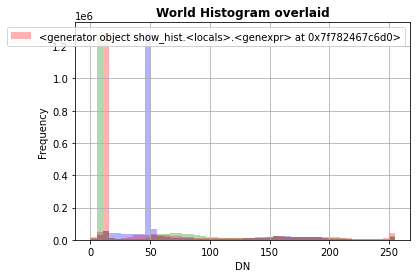

In [68]:
plot.show_hist(world, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")

Um die Konturlinien aus einem Raster anzeigen:

```
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-50, 0)
ax.set_ylim(0, 40)

plot.show((world, 1), contour=True, ax=ax)
```

<AxesSubplot:>

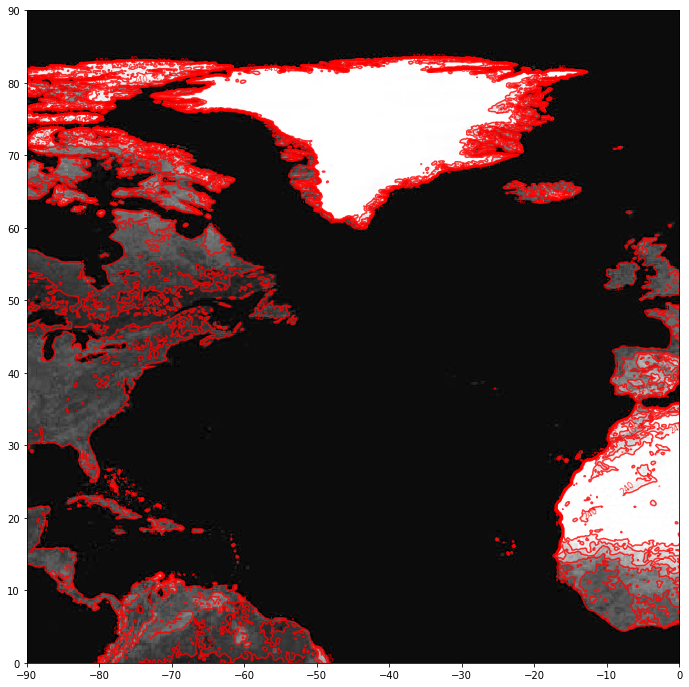

In [70]:
fig, ax = plt.subplots(1, figsize=(12, 12))
plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-90, 0)
ax.set_ylim(0, 90)

plot.show((world, 1), contour=True, ax=ax)

# Kommandozeilen-basierte Befehle

Einige Befehle zur Berechnung von DEM-abgeleiteten Produkten können auch über die Kommandozeile direkt abgesetzt werden. So können bspw. anhand eines DEM die Folgedaten wie Exposition, Schummerung und Neigung berechnet werden. Dies geschieht mit den folgenden Befehlen:

```
gdaldem <zielprodukt> <Dateiname DEM> <Zieldatei> <Produkt-Kürzel> <weitere produktspezifische Parameter>
```

Zum Beispiel:

```
gdaldem slope Daten/Elevation_raster.tif Daten/Ele_slope.tif -s 10000 
```

Diese Befehle können natürlich auch als Kommandozeilenbefehle innerhalb von Python abgesetzt werden:

```
import os

imagefilename = "Daten/Elevation_raster.tif"
path = "Daten/"

sloapcommand = 'gdaldem slope %s %sEle_slope.tif -s 10000' %(imagefilename,path)
print ("command to run: %s" %sloapcommand)   #gdaldem slope input_dem output_slope_map

os.system(sloapcommand)

aspectcommand = 'gdaldem aspect %s %sEle_aspect.tif' %(imagefilename,path) 
print ("command to run: %s" %aspectcommand)  #gdaldem aspect input_dem output_aspect_map

os.system(aspectcommand) 

hillshadecommand = 'gdaldem hillshade %s %sEle_hillshade.tif' %(imagefilename,path) 
print ("command to run: %s" %hillshadecommand)  #gdaldem aspect input_dem output_aspect_map

os.system(hillshadecommand) 
```

In [71]:
import os

imagefilename = "Data/Elevation_raster.tif"
path = "Data/"

sloapcommand = 'gdaldem slope %s %sEle_slope.tif -s 10000' %(imagefilename,path)
print ("command to run: %s" %sloapcommand)   #gdaldem slope input_dem output_slope_map

os.system(sloapcommand)

aspectcommand = 'gdaldem aspect %s %sEle_aspect.tif' %(imagefilename,path) 
print ("command to run: %s" %aspectcommand)  #gdaldem aspect input_dem output_aspect_map

os.system(aspectcommand) 

hillshadecommand = 'gdaldem hillshade %s %sEle_hillshade.tif' %(imagefilename,path) 
print ("command to run: %s" %hillshadecommand)  #gdaldem aspect input_dem output_aspect_map

os.system(hillshadecommand) 

command to run: gdaldem slope Data/Elevation_raster.tif Data/Ele_slope.tif -s 10000
0...10...20...30...40...50...60...70...80...90...100 - done.
command to run: gdaldem aspect Data/Elevation_raster.tif Data/Ele_aspect.tif
0...10...20...30...40...50...60...70...80...90...100 - done.
command to run: gdaldem hillshade Data/Elevation_raster.tif Data/Ele_hillshade.tif
0...10...20...30...40...50...60...70...80...90...100 - done.


0


Lösung:
Höhen (Ausgangsdaten):
![alt text](Hoehen.png "Höhen")
Ausrichtung:
![alt text](aspect.png "Höhen")
Neigung:
![alt text](slope.png "Höhen")




Als weiteres Beispiel sollen aus einem digitalen Höhenmodell (DEM), das als GeoTIFF vorliegt Kontur-Linien berechnet werden. Der Befehl lautet:

```
gdal_contour –a elevation –i 100.0 Elevation_raster.tif contour_100.shp 

```

Konturen:
![alt text](Contours.png "Höhen")
Konturen mit Höhen:
![alt text](ContourMitRaster.png "Höhen")

<div class="burk">
Als <b>*Übung*</b> soll folgendes erstellt werden: Erzeuge einen zufälligen Punkt, der innerhalb des Bereichs der Datei "ortho14_5m_rgb_solothurn.tif" liegt.</div><i class="fa fa-lightbulb-o "></i>

Lösung


In [72]:
#Lösung Pirmin
#Entwurf 2
#zufällige Koordinate generieren
import os, sys, numpy, time  #Module laden
from osgeo import gdal
from osgeo.gdalconst import *

import random

# register all of the drivers
gdal.AllRegister()
# open the image
ds = gdal.Open('Data/ortho14_5m_rgb_solothurn.tif', GA_ReadOnly)
if ds is None:
    print ('Could not open image')
    sys.exit()

transform = ds.GetGeoTransform()

xMin = transform[0]  #Koordinaten links oben auslesen
yMax = transform[3]

pX = transform[1]   #Pixelgrösse auslesen
pY = transform[5]

anzSpalten =ds.RasterXSize   #Anz. Spalten auslesen
anzZeilen = ds.RasterYSize

xMax = xMin + (pX*anzSpalten)   #Koordinaten rechts unten
yMin = yMax - (pY*anzZeilen*-1)


print(50*'*')
print('Eck-Koordinaten')
print(xMin)
print(xMax)
print(yMin)
print(yMax)

print(20*'-')
print(20*'-')
print('Zufalls-Koordinaten in ausgelesenem Bereich')
npx = xMin + (pX*(anzSpalten/2))
npy = yMax - (pY*(anzZeilen/2)*-1)
#print(npx)  #Zentrum
#print(npy)
new_Point2 = [npx, npy] 
rangeXY=(pX*anzSpalten)   #Pixelgrösse * Anz. Spalten
pointX2 = random.random() * rangeXY + new_Point2[0]
pointY2 = random.random() * rangeXY + new_Point2[1]
print(pointX2)
print(pointY2)



**************************************************
Eck-Koordinaten
592000.0
621000.0
213000.0
237000.0
--------------------
--------------------
Zufalls-Koordinaten in ausgelesenem Bereich
612791.9345037615
245642.07808502179


<div class="burk">
Als weitere <b>Übung</b> soll folgendes erstellt werden: Erzeuge eine Punktliste mit zufällig verteilten Punkten, die alle innerhalb des Höhenmodells "Elevation_Raster.tif" liegen und bestimme für jeden dieser Punkte den Höhenwert, die Ausrichtung und die Neigung.</div><i class="fa fa-lightbulb-o "></i>

In [74]:
#obtained from http://www.gis.usu.edu/~chrisg/python/2009/lectures/ospy_slides4.pdf and adapted

# script to get pixel values at a set of coordinate
# by reading in one pixel at a time
# modified to read altitude, aspect and sloap from the band

import os, sys, numpy, time
from osgeo import gdal
from osgeo.gdalconst import *
import random

random.seed()

'''
Infos zur Rasterdatei:
Lower Left  (   9.9998611,  47.2498611) (  9d59'59.50"E, 47d14'59.50"N)
Upper Right (  10.2501389,  47.5001389) ( 10d15' 0.50"E, 47d30' 0.50"N)
Pixel Size = (0.000277777777778,-0.000277777777778)
Size is 901, 901
'''    
xValues = []
yValues = []
pntnumber = input("Anzahl zuf. Punkte:")
for i in range(1, int(pntnumber)+1):
    #Erzeuge zufällige Koordinatenwerte
    rechts = random.random() * 0.000277777777778 * 901 + 9.9998611
    hoch = random.random() * 0.000277777777778 * 901 + 47.2498611

    # coordinates to get pixel values for
    xValues.append(rechts)
    yValues.append(hoch)
    
    #print("%i. Punkt: x= %f | y= %f" %(i,rechts, hoch))

# start timing
startTime = time.time()
    
# register all of the drivers
gdal.AllRegister()

imagefilename = "Data/Elevation_raster.tif"
path = "Data/"

# open the image
ds = gdal.Open(imagefilename) #The band is altitude values

if ds is None:
    print ('Could not open image') 
    sys.exit(1)

# Translate to slope and aspect /          #gdaldem hillshade input_dem output_hillshade

# File to store results and open in QGIS
rndpntfl = open("_randompointfilewithDEMinfo.csv","w")

slopecommand = 'gdaldem slope %s %sEle_slope.tif -s 10000' %(imagefilename,path)
#print ("command to run: %s" %slopecommand)   #gdaldem slope input_dem output_slope_map

os.system(slopecommand)

aspectcommand = 'gdaldem aspect %s %sEle_aspect.tif' %(imagefilename,path) 
#print ("command to run: %s" %aspectcommand)  #gdaldem aspect input_dem output_aspect_map

os.system(aspectcommand)           

dl= gdal.Open(path + 'Ele_slope.tif')
da= gdal.Open(path + 'Ele_aspect.tif')

# get image size
rows = ds.RasterYSize
cols = ds.RasterXSize
bands = ds.RasterCount

bandsaspect = da.RasterCount
bandsslope = dl.RasterCount

# get georeference info
transform = ds.GetGeoTransform()
xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = transform[5]


print ('Ursprung der Rasterdatei: ', xOrigin , yOrigin)
print("")
print ('X | Y | xOffset | yOffset | Altitude  | Aspect  | Slope |' )
rndpntfl.write('X, Y, xOffset, yOffset, Altitude, Aspect, Slope \n')

# loop through the coordinates
for k in range(len(xValues)):
    x = xValues[k]
    y = yValues[k]

# compute pixel offset
    xOffset = int((x - xOrigin) / pixelWidth)
    yOffset = int((y - yOrigin) / pixelHeight)

# create a string to print out
    s = str(x) + ' ' + str(y) + ' ' + str(xOffset) + ' ' + str(yOffset) + ' '

# loop through the bands

    for j in range(bands):
        band = ds.GetRasterBand(j+1) # 1-based index
        # read data and add the value to the string
        data = band.ReadAsArray(xOffset, yOffset, 1, 1)
        value = data[0,0]
        s = s + str(value) + ' '
        
    #get aspect value 
    for f in range(bandsaspect):
        band_da = da.GetRasterBand(f+1) # 1-based index
        # read data and add the value to the string
        data_da = band_da.ReadAsArray(xOffset, yOffset, 1, 1)
        value_da = data_da[0,0]
        s = s + str(value_da) + ' '

    #get slope value
    for e in range(bandsslope):
        band_dl = dl.GetRasterBand(e+1) # 1-based index

        # read data and add the value to the string
        data_dl = band_dl.ReadAsArray(xOffset, yOffset, 1, 1)
        value_dl = data_dl[0,0]

        s = s + str(value_dl) + ' \n'

    #print out the data string
    s2=s.replace("\n","")
    print (s2)
    rndpntfl.write(s.replace(" ",", "))
    #print ("")


# figure out how long the script took to run
endTime = time.time()
print ('The script took ' + str(endTime - startTime) + ' seconds')
rndpntfl.close()

Anzahl zuf. Punkte:10
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Ursprung der Rasterdatei:  9.99986111111111 47.500138888888884

X | Y | xOffset | yOffset | Altitude  | Aspect  | Slope |
10.140045664663159 47.472673465398756 504 98 1604 41.987213 80.62077 
10.222796240161848 47.27212281156367 802 820 -32767 -9999.0 -9999.0 
10.21439194309045 47.34193194054889 772 569 1818 147.17146 73.23866 
10.121873417781332 47.36348780230937 439 491 1825 49.92711 74.894646 
10.08735851767012 47.28219106748683 314 784 2156 355.4261 86.83028 
10.053960634546096 47.38986998091745 194 396 1287 205.88416 85.178055 
10.079734313866465 47.43269924855027 287 242 1655 8.841812 76.28888 
10.073156076387075 47.42641239161472 263 265 1411 177.10143 82.00415 
10.227946020322483 47.474977764186235 821 90 967 72.55281 58.79628 
10.182669051878259 47.32299393305877 658 637 1562 203.1986 78.991844 
The script took 0.2969248294830322 secon

## Extraktion eines Teilbereichs einer Rasterdatei ###


Im folgenden wird ein Teilbereich aus einer Rasterdatei ausgeschnitten. Es kann sein, dass bspw. aus einem Luft- oder Satellitenbild ein bestimmter Teil extrahiert und in einer separaten Rasterdatei gespeichert werden soll.

```
import os, sys
from osgeo import gdal
from osgeo.gdalconst import *

# register all of the drivers
gdal.AllRegister()

#Open Rasterfile
fn = 'Daten/worldmap.jpg'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden' %fn)
    sys.exit(1)

os.system('gdalinfo %s' %fn) 
translatecommand = 'gdal_translate -projwin 1680 170 2200 550 %s Daten/europe.tif' %fn
print ("command to run: %s" %translatecommand )
os.system(translatecommand)

#kleinere Kopie von Europa
translatecommand = 'gdal_translate -projwin 1680 170 2200 550 -outsize 50%% 50%% %s Daten/europesmall.tif' %fn
print ("command to run: %s" %translatecommand) 
os.system(translatecommand)

print ("")
os.system('gdalinfo Daten/europe.tif')
print ("")
os.system('gdalinfo Daten/europesmall.tif')
```

In [76]:
import os, sys
from osgeo import gdal
from osgeo.gdalconst import *

# register all of the drivers
gdal.AllRegister()

#Open Rasterfile
fn = 'Data/worldmap.jpg'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden' %fn)
    sys.exit(1)

os.system('gdalinfo %s' %fn) 
translatecommand = 'gdal_translate -projwin 1680 170 2200 550 %s Data/europe.tif' %fn
print ("command to run: %s" %translatecommand )
os.system(translatecommand)

#kleinere Kopie von Europa
translatecommand = 'gdal_translate -projwin 1680 170 2200 550 -outsize 50%% 50%% %s Data/europesmall.tif' %fn
print ("command to run: %s" %translatecommand) 
os.system(translatecommand)

print ("")
os.system('gdalinfo Data/europe.tif')
print ("")
os.system('gdalinfo Data/europesmall.tif')


Driver: JPEG/JPEG JFIF
Files: Data/worldmap.jpg
Size is 3600, 1800
Image Structure Metadata:
  COMPRESSION=JPEG
  INTERLEAVE=PIXEL
  SOURCE_COLOR_SPACE=YCbCr
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0, 1800.0)
Upper Right ( 3600.0,    0.0)
Lower Right ( 3600.0, 1800.0)
Center      ( 1800.0,  900.0)
Band 1 Block=3600x1 Type=Byte, ColorInterp=Red
  Overviews: 1800x900, 900x450, 450x225
  Image Structure Metadata:
    COMPRESSION=JPEG
Band 2 Block=3600x1 Type=Byte, ColorInterp=Green
  Overviews: 1800x900, 900x450, 450x225
  Image Structure Metadata:
    COMPRESSION=JPEG
Band 3 Block=3600x1 Type=Byte, ColorInterp=Blue
  Overviews: 1800x900, 900x450, 450x225
  Image Structure Metadata:
    COMPRESSION=JPEG
command to run: gdal_translate -projwin 1680 170 2200 550 Data/worldmap.jpg Data/europe.tif
Input file size is 3600, 1800
0...10...20...30...40...50...60...70...80...90...100 - done.
command to run: gdal_translate -projwin 1680 170 2200 550 -outsize 50% 50% Dat

0

Dasselbe mit einem Ausschnitt aus dem Luftbild von Solothurn:

```
import os, sys
from osgeo import gdal
from osgeo.gdalconst import *

# register all of the drivers
gdal.AllRegister()

#Open Rasterfile
fn = 'Daten/ortho14_5m_rgb_solothurn.tif'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden' %fn)
    sys.exit(1)

os.system('gdalinfo %s' %fn) 
translatecommand = 'gdal_translate -projwin 602900 228400 605100 226500 %s Daten/ausschnittSo.tif' %fn
print ("command to run: %s" %translatecommand )
os.system(translatecommand)
```

In [77]:
### import os, sys
from osgeo import gdal
from osgeo.gdalconst import *

# register all of the drivers
gdal.AllRegister()

#Open Rasterfile
fn = 'Data/ortho14_5m_rgb_solothurn.tif'
ds = gdal.Open(fn)
if ds is None:
    print ('Datensatz %s konnte nicht geöffnet werden' %fn)
    sys.exit(1)

os.system('gdalinfo %s' %fn) 
translatecommand = 'gdal_translate -projwin 602900 228400 605100 226500 %s Data/ausschnittSo.png' %fn
print ("command to run: %s" %translatecommand )
os.system(translatecommand)


Driver: GTiff/GeoTIFF
Files: Data/ortho14_5m_rgb_solothurn.tif
Size is 5800, 4800
Coordinate System is:
PROJCRS["CH1903 / LV03",
    BASEGEOGCRS["CH1903",
        DATUM["CH1903",
            ELLIPSOID["Bessel 1841",6377397.155,299.1528128,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4149]],
    CONVERSION["Swiss Oblique Mercator 1903M",
        METHOD["Hotine Oblique Mercator (variant B)",
            ID["EPSG",9815]],
        PARAMETER["Latitude of projection centre",46.9524055555556,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8811]],
        PARAMETER["Longitude of projection centre",7.43958333333333,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8812]],
        PARAMETER["Azimuth of initial line",90,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8813]],
        PARAMETER["Angle from Rectified to Skew 

0


![alt text](Data/ausschnittSo.png "Ausschnitt Solothurn")



# Geodaten schreiben #

Bisher wurden Geodaten ausschliesslich analysiert. Es wurden Informationen aus vorliegenden Geodaten extrahiert und ausgegeben. Dazu gehörten Attributnamen und -werte, Informationen zum Projektionssystem oder die Ausdehnung usf. In diesem Kapitel sollen nun Geodaten geschrieben, dh. erstellt werden. Analog zur Analyse existierender Daten können wichtige Schritte bei der Erstellung einer neuen Ebene konzeptionell festgehalten werden. Zu diesen zählen in Bezug auf den zu erstellenden Datensatz die Definition bzw. Festlegung von:

* Namen
* Speicherort 
* Format 
* Räumliches Bezugssystem
* Räumlicher Datentyp
* Attributnamen
* Attributdatentypen und ggf -länge
* Ev. Wertebereiche


In Bezug auf die einzelnen Objekte / Features müssen schliesslich die folgenden Informationen bekannt sein und verarbeitet werden:

* Attributwerte
* Primäre Metrik (Koordinaten)
* Falls nötig: Fremdschlüssel für Verlinkung mit anderen Datensätzen


### Festlegen des Projektionssystems:

```
import osr
srs = osr.SpatialReference()
#srs.SetWellKnownGeogCS('WGS84')
srs.SetFromUserInput("EPSG:21781")

print(srs.GetAttrValue("AUTHORITY", 0))
print(srs.GetAttrValue("AUTHORITY", 1))
print()
prj1=srs.ExportToWkt()
print(prj1)
print()
prj2=srs.ExportToPrettyWkt()
print(prj2)
print()
prj3=srs.ExportToProj4()
print(prj3)
```

In [78]:
from osgeo import osr
srs = osr.SpatialReference()
#srs.SetWellKnownGeogCS('WGS84')
srs.SetFromUserInput("EPSG:21781")

print(srs.GetAttrValue("AUTHORITY", 0))
print(srs.GetAttrValue("AUTHORITY", 1))
print()
prj1=srs.ExportToWkt()
print(prj1)
print()
prj2=srs.ExportToPrettyWkt()
print(prj2)
print()
prj3=srs.ExportToProj4()
print(prj3)

EPSG
21781

PROJCS["CH1903 / LV03",GEOGCS["CH1903",DATUM["CH1903",SPHEROID["Bessel 1841",6377397.155,299.1528128,AUTHORITY["EPSG","7004"]],AUTHORITY["EPSG","6149"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4149"]],PROJECTION["Hotine_Oblique_Mercator_Azimuth_Center"],PARAMETER["latitude_of_center",46.9524055555556],PARAMETER["longitude_of_center",7.43958333333333],PARAMETER["azimuth",90],PARAMETER["rectified_grid_angle",90],PARAMETER["scale_factor",1],PARAMETER["false_easting",600000],PARAMETER["false_northing",200000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","21781"]]

PROJCS["CH1903 / LV03",
    GEOGCS["CH1903",
        DATUM["CH1903",
            SPHEROID["Bessel 1841",6377397.155,299.1528128,
                AUTHORITY["EPSG","7004"]],
            AUTHORITY["EPSG","6149"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],


Alternativ kann auch das Projektionssystem aus einem bestehenden Layer übernommen werden:

```
import ogr,osr

shapefile = ogr.Open("Daten/Gemeinden_Solothurn.shp")
layer = shapefile.GetLayer(0)
srs = osr.SpatialReference()
srs.ImportFromProj4(layer.GetSpatialRef().ExportToProj4())

prj1=srs.ExportToWkt()
print(prj1)


shapefile2 = ogr.Open("Daten/TM_WORLD_BORDERS-0.3.shp")
layer2 = shapefile2.GetLayer(0)
srs2 = osr.SpatialReference()
srs2.ImportFromProj4(layer2.GetSpatialRef().ExportToProj4())

print()
prj2=srs2.ExportToWkt()
print(prj2)
```

In [80]:
from osgeo import ogr,osr

shapefile = ogr.Open("Data/Gemeinden_Solothurn.shp")
layer = shapefile.GetLayer(0)
srs = osr.SpatialReference()
srs.ImportFromProj4(layer.GetSpatialRef().ExportToProj4())

prj1=srs.ExportToWkt()
print(prj1)


shapefile2 = ogr.Open("Data/TM_WORLD_BORDERS-0.3.shp")
layer2 = shapefile2.GetLayer(0)
srs2 = osr.SpatialReference()
srs2.ImportFromProj4(layer2.GetSpatialRef().ExportToProj4())

print()
prj2=srs2.ExportToWkt()
print(prj2)


PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_Bessel_1841_ellipsoid",SPHEROID["Bessel 1841",6377397.155,299.1528128],TOWGS84[674.374,15.056,405.346,0,0,0,0]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Hotine_Oblique_Mercator_Azimuth_Center"],PARAMETER["latitude_of_center",46.9524055555556],PARAMETER["longitude_of_center",7.43958333333333],PARAMETER["azimuth",90],PARAMETER["rectified_grid_angle",90],PARAMETER["scale_factor",1],PARAMETER["false_easting",600000],PARAMETER["false_northing",200000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

GEOGCS["unknown",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


### Definition von Layername, Speicherort und Dateiformat

Als erstes werden der Dateiname, der Speicherort und das Dateiformat des zu erstellenden Datensatzes definiert. Dazu dienen folgende Befehle:

```
import ogr,os
driver = ogr.GetDriverByName("Esri Shapefile")    #gemäss http://gdal.org/1.11/ogr/ogr_formats.html

if os.path.exists("../Daten/_Quadrat.shp"):
    driver.DeleteDataSource("../Daten/_Quadrat.shp") 

destinationFile = driver.CreateDataSource("../Daten/_Quadrat.shp")
destinationLayer = destinationFile.CreateLayer("Layer", srs)

```

In [82]:
from osgeo import ogr
import os
driver = ogr.GetDriverByName("Esri Shapefile")    #gemäss http://gdal.org/1.11/ogr/ogr_formats.html
#driver = ogr.GetDriverByName("GeoJSON")

if os.path.exists("Data/_Quadrat.shp"):
    driver.DeleteDataSource("Data/_Quadrat.shp") 

destinationFile = driver.CreateDataSource("Data/_Quadrat.shp")
destinationLayer = destinationFile.CreateLayer("Layer", srs)

#destinationFile = driver.CreateDataSource("../Daten/NeuerLayer.geojson")
#destinationLayer = destinationFile.CreateLayer("Layer", srs)


Nach der Erstellung des neuen Datensatzes müssen die Attribute im festgelegt werden. Im Folgenden werden zwei neue Spalten definiert: Name vom Typ String mit der maximalen Länge von 80 Zeichen und Bemerkung vom Typ String mit der maximalen Länge von 80 Zeichen. Diesen können bspw. wie folgt definiert werden:

(vgl. auch <a href="http://www.gdal.org/ogr__core_8h.html#a787194bea637faf12d61643124a7c9fc">http://www.gdal.org/ogr__core_8h.html#a787194bea637faf12d61643124a7c9fc</a>)

```
fieldDef = ogr.FieldDefn("Name",ogr.OFTString)
fieldDef.SetWidth(80)
destinationLayer.CreateField(fieldDef)

fieldDef = ogr.FieldDefn("Bemerkung", ogr.OFTString)
fieldDef.SetWidth(100)
destinationLayer.CreateField(fieldDef)

fieldDef = ogr.FieldDefn("ID",ogr.OFTInteger)
destinationLayer.CreateField(fieldDef)
```

In [83]:
fieldDef = ogr.FieldDefn("Name",ogr.OFTString)
fieldDef.SetWidth(80)
destinationLayer.CreateField(fieldDef)

fieldDef = ogr.FieldDefn("Bemerkung", ogr.OFTString)
fieldDef.SetWidth(100)
destinationLayer.CreateField(fieldDef)

fieldDef = ogr.FieldDefn("ID",ogr.OFTInteger)
destinationLayer.CreateField(fieldDef)


0

Manchmal kann es sein, dass die gesamte Dateistruktur eines bestehenden Datensatzes übernommen werden soll. In diesem Fall wird zuerst der Ursprungsdatensatz (sourcelayer) geöffnet und anschliessend über jedes der vorhandenen Attribute iteriert und deren Definition dem Definitionsobjekt für den neu zu erstellenden Datensatz hinzugefügt:
Falls die Attribut-Struktur einer bestehenden Ebene gleich übernommen werden soll für den Ziel-Layer kann dies wie folgt umgesetzt werden:


```
import ogr
ds = ogr.Open("../Daten/Gemeinden_Solothurn.shp")
sourcelayer = ds.GetLayer(0)
layer_def = sourcelayer.GetLayerDefn()
numatts = layer_def.GetFieldCount()
print("Anzahl Attribute: %d" %numatts)
for i in range(layer_def.GetFieldCount()):
    destinationLayer.CreateField(layer_def.GetFieldDefn(i))
```

In [84]:
from osgeo import ogr
ds = ogr.Open("Data/Gemeinden_Solothurn.shp")
sourcelayer = ds.GetLayer(0)
layer_def = sourcelayer.GetLayerDefn()
numatts = layer_def.GetFieldCount()
print("Anzahl Attribute: %d" %numatts)
for i in range(layer_def.GetFieldCount()):
    destinationLayer.CreateField(layer_def.GetFieldDefn(i))


Anzahl Attribute: 11


Warning 6: Normalized/laundered field name: 'name' to 'name_1'


```
ftrName = "Erstes Features"

minEasting = 10
maxEasting = 20
minNorthing = 15
maxNorthing = 25

#Definition des OGR Geometrieobjekts als LinearRing
linearRing = ogr.Geometry(ogr.wkbLinearRing)
#Hinzufügen der Stützpunkte des LinearRing
linearRing.AddPoint(minEasting, minNorthing)
linearRing.AddPoint(maxEasting, minNorthing)
linearRing.AddPoint(maxEasting, maxNorthing)
linearRing.AddPoint(minEasting, maxNorthing)
linearRing.AddPoint(minEasting, minNorthing)

#Instanzieren der Geometrie als WKBPolygon ins sqr Objekt
sqr = ogr.Geometry(ogr.wkbPolygon)
#Zuweisen der Geometrie zum instanzierten Objekt
sqr.AddGeometry(linearRing)
#Neues Feature erhält Attributdefinition
sqrfeature = ogr.Feature(destinationLayer.GetLayerDefn())
#Neues Feature erhält Geometrie
sqrfeature.SetGeometry(sqr)
#Neues Feature erhält für das Attribut Name den Wert "Erstes Feature" 
sqrfeature.SetField("Name", ftrName)
#Erstellung des Features im neuen Layer
destinationLayer.CreateFeature(sqrfeature)
sqrfeature.Destroy()
```

In [85]:
ftrName = "Erstes Features"

#geometry = feature.GetGeometryRef()
minEasting = 10
maxEasting = 20
minNorthing = 15
maxNorthing = 25

#Definition des OGR Geometrieobjekts als LinearRing
linearRing = ogr.Geometry(ogr.wkbLinearRing)
#Hinzufügen der Stützpunkte des LinearRing
linearRing.AddPoint(minEasting, minNorthing)
linearRing.AddPoint(maxEasting, minNorthing)
linearRing.AddPoint(maxEasting, maxNorthing)
linearRing.AddPoint(minEasting, maxNorthing)
linearRing.AddPoint(minEasting, minNorthing)

#Instanzieren der Geometrie als WKBPolygon ins sqr Objekt
sqr = ogr.Geometry(ogr.wkbPolygon)
#Zuweisen der Geometrie zum instanzierten Objekt
sqr.AddGeometry(linearRing)
#Neues Feature erhält Attributdefinition
sqrfeature = ogr.Feature(destinationLayer.GetLayerDefn())
#Neues Feature erhält Geometrie
sqrfeature.SetGeometry(sqr)
#Neues Feature erhält für das Attribut Name den Wert "Erstes Feature" 
sqrfeature.SetField("Name", ftrName)
#Erstellung des Features im neuen Layer
destinationLayer.CreateFeature(sqrfeature)
sqrfeature.Destroy()

<div class="burk">
Das gesamte Skript soll nun zusammengestellt und ausgeführt werden...</div><i class="fa fa-lightbulb-o "></i>

In [86]:
from osgeo import ogr,osr
import os
#Definition SRS
srs = osr.SpatialReference()
srs.SetWellKnownGeogCS('WGS84')

#Erstellen der neuen Ebene/Layer
driver = ogr.GetDriverByName("Esri Shapefile")
newLyr = 'Data/NeuerLayer.shp'
#driver = ogr.GetDriverByName("GeoJSON")
if os.path.exists(newLyr):
    driver.DeleteDataSource(newLyr) 
destinationFile = driver.CreateDataSource(newLyr)
#destinationFile = driver.CreateDataSource("Daten/NeuerLayer.geojson")
destinationLayer = destinationFile.CreateLayer("Layer", srs)

#Festlegung der Attribute
fieldDef = ogr.FieldDefn('Id', ogr.OFTInteger)
destinationLayer.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("Name",ogr.OFTString)
fieldDef.SetWidth(80)
destinationLayer.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("Bemerkung", ogr.OFTString)
fieldDef.SetWidth(100)
destinationLayer.CreateField(fieldDef)

#Erstellen eines Features
ftrName = "Erstes Feature"
ftrBem = "Dies ist mein erstes selbst erstelltes Features"

#geometry = feature.GetGeometryRef()
minEasting = 10
maxEasting = 20
minNorthing = 15
maxNorthing = 25

#Definition des OGR Geometrieobjekts als LinearRing
linearRing = ogr.Geometry(ogr.wkbLinearRing)
#Hinzufügen der Stützpunkte des LinearRing
linearRing.AddPoint(minEasting, minNorthing)
linearRing.AddPoint(maxEasting, minNorthing)
linearRing.AddPoint(maxEasting, maxNorthing)
linearRing.AddPoint(minEasting, maxNorthing)
linearRing.AddPoint(minEasting, minNorthing)

#Instanzieren der Geometrie als WKBPolygon ins sqr Objekt
sqr = ogr.Geometry(ogr.wkbPolygon)
#Zuweisen der Geometrie zum instanzierten Objekt
sqr.AddGeometry(linearRing)
#Neues Feature erhält Attributdefinition
sqrfeature = ogr.Feature(destinationLayer.GetLayerDefn())
#Neues Feature erhält Geometrie
sqrfeature.SetGeometry(sqr)
#Neues Feature erhält für das Attribut Name den Wert "Erstes Feature" 
sqrfeature.SetField("Id", 1)
sqrfeature.SetField("Name", ftrName)
sqrfeature.SetField("Bemerkung", ftrBem)
#Erstellung des Features im neuen Layer
destinationLayer.CreateFeature(sqrfeature)
sqrfeature.Destroy()

print("Erstellung abgeschlossen")
destinationFile.Destroy()

Erstellung abgeschlossen


<div class="burk">
Statt eines Quadrats soll nun eine Flächengeometrie mit einer Insel ("Donut"Fläche) erzeugt und in einer neuen Shape-Datei abgelegt werden (GeoJSON statt Esri Shape). Dazu ein Tipp: es geht um eine Flächengeometrie mit Insel (dh. 2. linearen Ring).</div><i class="fa fa-lightbulb-o "></i>

In [87]:
from osgeo import ogr,osr
import os

#Definition SRS
srs = osr.SpatialReference()
srs.SetWellKnownGeogCS('WGS84')

#Erstellen der neuen Ebene/Layer
#driver = ogr.GetDriverByName("Esri Shapefile2")
driver = ogr.GetDriverByName("GeoJSON")
newLyr = "Data/NeuerLayer.geojson"
if os.path.exists(newLyr):
    driver.DeleteDataSource(newLyr) 
#destinationFile = driver.CreateDataSource("Daten/NeuerLayer.shp")
destinationFile = driver.CreateDataSource(newLyr)
destinationLayer = destinationFile.CreateLayer("Layer", srs)

#Festlegung der Attribute
fieldDef = ogr.FieldDefn('Id', ogr.OFTInteger)
destinationLayer.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("Name",ogr.OFTString)
fieldDef.SetWidth(80)
destinationLayer.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("Bemerkung", ogr.OFTString)
fieldDef.SetWidth(100)
destinationLayer.CreateField(fieldDef)

#Erstellen eines Features
ftrName = "Erstes Feature"
ftrBem = "Dies ist mein erstes selbst erstelltes Features"

#geometry = feature.GetGeometryRef()
minEasting = 10
maxEasting = 20
minNorthing = 15
maxNorthing = 25

#Definition des OGR Geometrieobjekts als LinearRing
linearRing = ogr.Geometry(ogr.wkbLinearRing)
#Hinzufügen der Stützpunkte des LinearRing
linearRing.AddPoint(minEasting, minNorthing)
linearRing.AddPoint(maxEasting, minNorthing)
linearRing.AddPoint(maxEasting, maxNorthing)
linearRing.AddPoint(minEasting, maxNorthing)
linearRing.AddPoint(minEasting, minNorthing)

#Definition des OGR Geometrieobjekts als LinearRing
linearRing2 = ogr.Geometry(ogr.wkbLinearRing)
#Hinzufügen der Stützpunkte des LinearRing
linearRing2.AddPoint(minEasting+3, minNorthing+3)
linearRing2.AddPoint(maxEasting-3, minNorthing+3)
linearRing2.AddPoint(maxEasting-3, maxNorthing-3)
linearRing2.AddPoint(minEasting+3, maxNorthing-3)
linearRing2.AddPoint(minEasting+3, minNorthing+3)

#Definition des OGR Geometrieobjekts als LinearRing
linearRing3 = ogr.Geometry(ogr.wkbLinearRing)
#Hinzufügen der Stützpunkte des LinearRing
linearRing3.AddPoint(minEasting+30, minNorthing+30)
linearRing3.AddPoint(maxEasting+30, minNorthing+30)
linearRing3.AddPoint(maxEasting+30, maxNorthing+30)
linearRing3.AddPoint(minEasting+30, maxNorthing+30)
linearRing3.AddPoint(minEasting+30, minNorthing+30)

#Definition des OGR Geometrieobjekts als LinearRing
linearRing4 = ogr.Geometry(ogr.wkbLinearRing)
#Hinzufügen der Stützpunkte des LinearRing
linearRing4.AddPoint(minEasting+8, minNorthing+8)
linearRing4.AddPoint(maxEasting+25, minNorthing+8)
linearRing4.AddPoint(maxEasting+25, maxNorthing+25)
linearRing4.AddPoint(minEasting+8, maxNorthing+25)
linearRing4.AddPoint(minEasting+8, minNorthing+8)

#Instanzieren der Geometrie als WKBPolygon ins sqr Objekt
sqr = ogr.Geometry(ogr.wkbPolygon)
#Zuweisen der Geometrie zum instanzierten Objekt
sqr.AddGeometry(linearRing)
sqr.AddGeometry(linearRing2)
sqr.AddGeometry(linearRing3)
sqr.AddGeometry(linearRing4)
#Neues Feature erhält Attributdefinition
sqrfeature = ogr.Feature(destinationLayer.GetLayerDefn())
#Neues Feature erhält Geometrie
sqrfeature.SetGeometry(sqr)
#Neues Feature erhält für das Attribut Name den Wert "Erstes Feature" 
sqrfeature.SetField("Id", 1)
sqrfeature.SetField("Name", ftrName)
sqrfeature.SetField("Bemerkung", ftrBem)
#Erstellung des Features im neuen Layer
destinationLayer.CreateFeature(sqrfeature)
sqrfeature.Destroy()

print("Erstellung abgeschlossen")
destinationFile.Destroy()

Erstellung abgeschlossen


<img src="donut.png">

Im Zusammenhang mit der Erstellung von Geometrieobjekten ist folgender Link zu empfehlen:
[[https://www.gis.usu.edu/~chrisg/python/2009/lectures/ospy_slides2.pdf]]


<div class="burk">
Als Übung soll das Skript dahingehend angepasst werden, dass in die neue Ebene alle Gemeinden von Solothurn geschrieben werden. Die Id-Spalte soll nachgeführt und der Name der Gemeinde übernommen werden. Das Bemerkungsfeld kann frei bleiben.</div><i class="fa fa-lightbulb-o "></i>

In [88]:
from osgeo import ogr,osr
import os

#Öffnen der So-Gemeinden
gemeindenSo = ogr.Open("Data/Gemeinden_Solothurn.shp")
if gemeindenSo is None:
    print("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit()

sourcelayer = gemeindenSo.GetLayer(0)
lname = sourcelayer.GetName()

#Definition SRS
srs = osr.SpatialReference()
srs.SetWellKnownGeogCS('WGS84')

#Erstellen der neuen Ebene/Layer
#driver = ogr.GetDriverByName("Esri Shapefile")
driver = ogr.GetDriverByName("GeoJSON")
newLyr = "Data/NeuerLayer.geojson"
if os.path.exists(newLyr):
    driver.DeleteDataSource(newLyr) 
#if os.path.exists("../Daten/NeuerLayer.shp"):
#    driver.DeleteDataSource("../Daten/NeuerLayer.shp") 
#destinationFile = driver.CreateDataSource("../Daten/NeuerLayer.shp")
destinationFile = driver.CreateDataSource(newLyr)
destinationLayer = destinationFile.CreateLayer("Layer", srs)

#Festlegung der Attribute
fieldDef = ogr.FieldDefn('Id', ogr.OFTInteger)
destinationLayer.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("Name",ogr.OFTString)
fieldDef.SetWidth(80)
destinationLayer.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("Bemerkung", ogr.OFTString)
fieldDef.SetWidth(100)
destinationLayer.CreateField(fieldDef)

feature = sourcelayer.GetNextFeature()
i = 0
while feature:
    i += 1

    # Clone feature, setzte Attributwerte und füge es neuer Ebene hinzu:
    #Instanzieren der Geometrie als WKBPolygon ins sqr Objekt
    
    gemgeometry = feature.GetGeometryRef()
    clonedftr = ogr.Feature(destinationLayer.GetLayerDefn())
    clonedftr.SetGeometry(feature.GetGeometryRef())
    clonedftr.SetField("Id", i)
    clonedftr.SetField("Name", feature.GetField("NAME") )
    clonedftr.SetField("Bemerkung", "-")

    #Erstellung des Features im neuen Layer
    destinationLayer.CreateFeature(clonedftr)
    clonedftr.Destroy()
    feature = sourcelayer.GetNextFeature()

print("Erstellung abgeschlossen")
destinationFile.Destroy()
gemeindenSo.Destroy()

Erstellung abgeschlossen


<div class="burk">
Als weitere Übung soll ein Pythonskript geschrieben werden, welches die umgebenden Rechtecke (sog. MBR = minimum bounding rectangle) jeder Gemeinde als Polygone in einer separaten Datei einschliesslich des zugehörigen Namens speichert. Die Ein- und Ausgabedateien sollen als Parameter beim Aufruf des Skripts mitgegeben werden können (ebenso das Format der Ausgabedatei).
Ein möglicher Aufruf des Skripts wäre demnach:
<p style="font-family:courier new;">python writeMBR.py Gemeinden_Solothurn.shp gemMBR.tab 'MapInfo File' Name</p>
</div><i class="fa fa-lightbulb-o "></i>

Die Lösung könnte wie folgt aussehen:
<img src='gemMBR.png'>


In [90]:
from osge import ogr,osr,gdal,gdalconst

import os,sys

if len(sys.argv)  < 5 :
    print ("Verwendung: python extractMBR.py <Ausgangs-SHP> <ZielLayer> <ZielFormat> <ZielAttribut> <Attributfilter (optional)>")
    print ('z.B. python _1_extractMBR.py ../Daten/Gemeinden_Solothurn.shp areaMBR.tab "MapInfo File" Name "Name like 'A%'"')
    sys.exit(1)

sourcelayer = sys.argv[1]
destinationlayername = sys.argv[2]
destinationformat = sys.argv[3]
sourcefieldname = sys.argv[4]

if len(sys.argv)>4:
    filtercondition = sys.argv[5]
else:
    filtercondition = None

shapefile = ogr.Open(sourcelayer)
if shapefile is None:
        print("Datensatz konnte nicht geoeffnet werden.\n")
        sys.exit()

sourcelayer = shapefile.GetLayer(0)
srs = osr.SpatialReference()
srs.ImportFromProj4(sourcelayer.GetSpatialRef().ExportToProj4())

driver = ogr.GetDriverByName(destinationformat)
destinationFile = driver.CreateDataSource(destinationlayername)
destinationLayer = destinationFile.CreateLayer(destinationlayername[0:len(destinationlayername)-4], srs)

#Create Field to store the name
fieldDef = ogr.FieldDefn(sourcefieldname, ogr.OFTString)
fieldDef.SetWidth(100)
destinationLayer.CreateField(fieldDef)

if filtercondition is not None:
    sourcelayer.SetAttributeFilter(filtercondition)
    print("Filter aktiv")
feature = sourcelayer.GetNextFeature()
while feature:
    #Get value of Feature-Name
    ftrName = feature.GetField(sourcefieldname)
    #Get MBR
    geometry = feature.GetGeometryRef()
    minEasting,maxEasting,minNorthing,maxNorthing = geometry.GetEnvelope()
    #print("*"*20)
    #print(geometry.GetEnvelope())

    linearRing = ogr.Geometry(ogr.wkbLinearRing)
    linearRing.AddPoint(minEasting, minNorthing)
    linearRing.AddPoint(maxEasting, minNorthing)
    linearRing.AddPoint(maxEasting, maxNorthing)
    linearRing.AddPoint(minEasting, maxNorthing)
    linearRing.AddPoint(minEasting, minNorthing)
    mbr = ogr.Geometry(ogr.wkbPolygon)
    mbr.AddGeometry(linearRing)
    mbrfeature = ogr.Feature(destinationLayer.GetLayerDefn())
    mbrfeature.SetGeometry(mbr)
    mbrfeature.SetField(sourcefieldname, ftrName)
    destinationLayer.CreateFeature(mbrfeature)
    mbrfeature.Destroy()

    feature = sourcelayer.GetNextFeature()

shapefile.Destroy()
destinationFile.Destroy()
print ("Datei wurde erstellt: %s" %(destinationlayername))


SyntaxError: invalid syntax (3873088976.py, line 7)

### Umprojektion einer Ebene durch Umprojektion jedes einzelnen Datensatzes

In diesem Beispiel werden die Erkenntnisse von einem vorigen Kapitel (Umprojektion) aufgefrischt und auf einen gesamten Datensatz angewendet: die Gemeinden von Solothurn werden einzeln umprojiziert und in einem neuen Datensatz gespeichert. Dieser Vorgang könnte gut mit dem Einbau eines Attributfilters kombiniert werden.

```
import sys
import os
import osr
import ogr

#Datensatz aufbereiten und SRS bestimmen:
#Gemeinden SO in LV03
shapefileSO = ogr.Open('Daten/Gemeinden_Solothurn.shp')  
if shapefileSO is None:
    print ("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit()
sogemeinden = shapefileSO.GetLayer(0)
srcProjection = osr.SpatialReference()
srcProjection.ImportFromWkt(sogemeinden.GetSpatialRef().ExportToWkt())

dstProjection = osr.SpatialReference() 
dstProjection.ImportFromEPSG(4326)  

#Transformationsparameter
transformdef = osr.CoordinateTransformation(srcProjection, dstProjection)
driver = ogr.GetDriverByName('ESRI Shapefile')
if os.path.exists('Daten/GEMEINDEN_SO_WGS84.shp'):
    driver.DeleteDataSource('Daten/GEMEINDEN_SO_WGS84.shp') 

#Zieldatensatz vorbereiten:
destinationFile = driver.CreateDataSource('Daten/GEMEINDEN_SO_WGS84.shp')
destinationLayer = destinationFile.CreateLayer('Daten/GEMEINDEN_SO_WGS84', dstProjection, geom_type=ogr.wkbPolygon)

#Clone Attribute vom Ursprungs- in Ziellayer
for i in range(sogemeinden.GetLayerDefn().GetFieldCount()):
    destinationLayer.CreateField(sogemeinden.GetLayerDefn().GetFieldDefn(i))

#Umprojektion pro Features/DS
gemsofeature = sogemeinden.GetNextFeature()

while gemsofeature:
    curgemgeometry = gemsofeature.GetGeometryRef()
    transformedgeometry = curgemgeometry.Clone()
    transformedgeometry.Transform(transformdef)
    gemsofeature.SetGeometry(transformedgeometry)
    destinationLayer.CreateFeature(gemsofeature)
    gemsofeature.Destroy()
    gemsofeature = sogemeinden.GetNextFeature()

shapefileSO.Destroy()
destinationFile.Destroy()
print ("*" * 50)
print ("Umprojektion fertig!")
print ("*" * 50)

print ("Ausgabe in Shapefile ../Daten/GEMEINDEN_SO_WGS84.shp")
```


In [120]:
import sys
import os
from osgeo import osr, ogr

#Datensatz aufbereiten und SRS bestimmen:
#Gemeinden SO in LV03
shapefileSO = ogr.Open('Data/Gemeinden_Solothurn.shp')  
if shapefileSO is None:
    print ("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit()
sogemeinden = shapefileSO.GetLayer(0)
srcProjection = osr.SpatialReference()
srcProjection.ImportFromWkt(sogemeinden.GetSpatialRef().ExportToWkt())

dstProjection = osr.SpatialReference() 
dstProjection.ImportFromEPSG(4326)  

#Transformationsparameter
transformdef = osr.CoordinateTransformation(srcProjection, dstProjection)
driver = ogr.GetDriverByName('ESRI Shapefile')
if os.path.exists('Data/GEMEINDEN_SO_WGS84.shp'):
    driver.DeleteDataSource('Data/GEMEINDEN_SO_WGS84.shp') 

#Zieldatensatz vorbereiten:
destinationFile = driver.CreateDataSource('Data/GEMEINDEN_SO_WGS84.shp')
destinationLayer = destinationFile.CreateLayer('Data/GEMEINDEN_SO_WGS84', dstProjection, geom_type=ogr.wkbPolygon)

#Clone Attribute vom Ursprungs- in Ziellayer
for i in range(sogemeinden.GetLayerDefn().GetFieldCount()):
    destinationLayer.CreateField(sogemeinden.GetLayerDefn().GetFieldDefn(i))

#Umprojektion pro Features/DS
gemsofeature = sogemeinden.GetNextFeature()

while gemsofeature:
    curgemgeometry = gemsofeature.GetGeometryRef()
    transformedgeometry = curgemgeometry.Clone()
    transformedgeometry.Transform(transformdef)
    gemsofeature.SetGeometry(transformedgeometry)
    destinationLayer.CreateFeature(gemsofeature)
    gemsofeature.Destroy()
    gemsofeature = sogemeinden.GetNextFeature()

shapefileSO.Destroy()
destinationFile.Destroy()
print ("*" * 50)
print ("Umprojektion fertig!")
print ("*" * 50)

print ("Ausgabe in Shapefile Data/GEMEINDEN_SO_WGS84.shp")


**************************************************
Umprojektion fertig!
**************************************************
Ausgabe in Shapefile ../Daten/GEMEINDEN_SO_WGS84.shp


### Umprojektion von Rasterdaten

Die Umprojektion von Rasterdaten führt u.a. zu einer Neuberechnung der radiometrischen Auflösung. Damit werden effektiv die Original-Datenwerte verändert, welche durch eine Rücktransformation nicht zwangsläufig zu den ursprünglichen Werten führt! Dies im Gegensatz zur Umprojektion von Vektordaten!
Die Ausführung der Umprojektion einer Rasterdatei erfolgt am einfachsten als Kommandozeilenbefehl:


```
import os

os.system('gdal_translate -a_srs WGS84 -a_ullr -180 90 180 -90 ../Daten/world.png ../Daten/geoworld.tif')
os.system('gdalwarp -t_srs "+proj=merc +datum=WGS84" ../Daten/geoworld.tif ../Daten/mercator.tif')
os.system('gdalwarp -t_srs "+proj=ortho +datum=WGS84" ../Daten/geoworld.tif ../Daten/ortho.tif')
```



In [94]:
import os 
os.system('gdal_translate -a_srs WGS84 -a_ullr -180 90 180 -90 Data/world.png Data/geoworld.tif') 
os.system('gdalwarp -t_srs "+proj=merc +datum=WGS84" Data/geoworld.tif Data/mercator.tif') 
os.system('gdalwarp -t_srs "+proj=ortho +datum=WGS84" Data/geoworld.tif Data/ortho.tif')

Input file size is 2048, 1024
0...10...20...30...40...50...60...70...80...90...100 - done.
Processing Data/geoworld.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing Data/geoworld.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


0

### Daten schreiben mit Fiona und Shapely am Beispiel von einfachen Linien


Das folgende Code-Beispiel schreibt mittels Shapely zwei Linienfeatures in eine Esri Shapedatei:

```
import fiona
#  Shapely wird für die Definition der Geometrie benötigt
from shapely.geometry import LineString, mapping

# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema = {'geometry': 'LineString','properties': {'Id': 'str', 'Name': 'str'}}

# Zwei einfache Liniengeometrien
lines = [LineString([(272830.63,155125.73),(273770.32,155467.75)]),LineString([(273536.47,155914.07),(272033.12,152265.71)])]
with fiona.open('../Daten/mylineshapes.shp', 'w', 'ESRI Shapefile', schema) as layer:
    cnt = 0
    for line in lines:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(line) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Linie ' + str(cnt), 'Id' : str(cnt)}
        # Erstellen des neuen Datensatzes / Records
        layer.write(elem)
```

In [121]:
import fiona
#  Shapely wird für die Definition der Geometrie benötigt
from shapely.geometry import LineString, mapping

# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema = {'geometry': 'LineString','properties': {'Id': 'str', 'Name': 'str'}}

# Zwei einfache Liniengeometrien
lines = [LineString([(272830.63,155125.73),(273770.32,155467.75)]),LineString([(273536.47,155914.07),(272033.12,152265.71)])]
with fiona.open('Data/mylineshapes.shp', 'w', 'ESRI Shapefile', schema) as layer:
    cnt = 0
    for line in lines:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(line) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Linie ' + str(cnt), 'Id' : str(cnt)}
        # Erstellen des neuen Datensatzes / Records
        layer.write(elem)

### Geometrien schreiben

Das folgende Code-Beispiel schreibt mittels Fiona je Punkt-, Linien- und Flächengeometrien in eine Esri Shapedatei:

```
import fiona
#  Shapely wird für die Definition der Geometrie benötigt
from shapely.geometry import Point,LineString,Polygon, mapping


#######################################################################################
# Punktlayer erstellen:
# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema_pnt = {'geometry': 'Point','properties': {'Id': 'int', 'Name': 'str'}}

# Ein paar Punktgeometrien
points = [Point(272830.63, 155125.73),Point(273770.32,155467.75),Point(273536.47,155914.07),Point(272033.12,152265.71)]

with fiona.open('../Daten/mypointshapes.shp', 'w', 'ESRI Shapefile', schema_pnt) as pntlayer:
    cnt = 0
    for pnt in points:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(pnt) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Punkt ' + str(cnt), 'Id' : cnt}
        # Erstellen des neuen Datensatzes / Records
        pntlayer.write(elem)


#######################################################################################
# Linienlayer erstellen:
# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema = {'geometry': 'LineString','properties': {'Id': 'int', 'Name': 'str'}}

# Zwei einfache Liniengeometrien
lines = [LineString([(272830.63,155125.73),(273770.32,155467.75)]),LineString([(273536.47,155914.07),(272033.12,152265.71)])]
with fiona.open('../Daten/mylineshapes.shp', 'w', 'ESRI Shapefile', schema) as layer:
    cnt = 0
    for line in lines:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(line) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Linie ' + str(cnt), 'Id' : cnt}
        # Erstellen des neuen Datensatzes / Records
        layer.write(elem)
        
#######################################################################################
# Polygonlayer erstellen:
# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema = {'geometry': 'Polygon','properties': {'Id': 'int', 'Name': 'str'}}

# Zwei einfache Polygongeometrien
polygons = [Polygon([(272830.63,155125.73),(273536.47,155914.07),(273770.32,155467.75),(272033.12,152265.71)]),
           Polygon([(270800.0,155100.0),(270800.0,155200.0),(271000.0,155200.0),(271000.0,155100.0)])]
#polygon = Polygon([(0, 0), (1, 1), (1, 0)])
with fiona.open('../Daten/mypolygonshapes.shp', 'w', 'ESRI Shapefile', schema) as layer:
    cnt = 0
    for poly in polygons:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(poly) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Polygon ' + str(cnt), 'Id' : str(cnt)}
        # Erstellen des neuen Datensatzes / Records
        layer.write(elem)
```

In [122]:
import fiona
#  Shapely wird für die Definition der Geometrie benötigt
from shapely.geometry import Point,LineString,Polygon, mapping


#######################################################################################
# Punktlayer erstellen:
# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema_pnt = {'geometry': 'Point','properties': {'Id': 'int', 'Name': 'str'}}

# Ein paar Punktgeometrien
points = [Point(272830.63, 155125.73),Point(273770.32,155467.75),Point(273536.47,155914.07),Point(272033.12,152265.71)]

with fiona.open('Data/mypointshapes.shp', 'w', 'ESRI Shapefile', schema_pnt) as pntlayer:
    cnt = 0
    for pnt in points:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(pnt) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Punkt ' + str(cnt), 'Id' : cnt}
        # Erstellen des neuen Datensatzes / Records
        pntlayer.write(elem)


#######################################################################################
# Linienlayer erstellen:
# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema = {'geometry': 'LineString','properties': {'Id': 'int', 'Name': 'str'}}

# Zwei einfache Liniengeometrien
lines = [LineString([(272830.63,155125.73),(273770.32,155467.75)]),LineString([(273536.47,155914.07),(272033.12,152265.71)])]
with fiona.open('Data/mylineshapes.shp', 'w', 'ESRI Shapefile', schema) as layer:
    cnt = 0
    for line in lines:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(line) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Linie ' + str(cnt), 'Id' : cnt}
        # Erstellen des neuen Datensatzes / Records
        layer.write(elem)
        
#######################################################################################
# Polygonlayer erstellen:
# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema = {'geometry': 'Polygon','properties': {'Id': 'int', 'Name': 'str'}}

# Zwei einfache Polygongeometrien
polygons = [Polygon([(272830.63,155125.73),(273536.47,155914.07),(273770.32,155467.75),(272033.12,152265.71)]),
           Polygon([(270800.0,155100.0),(270800.0,155200.0),(271000.0,155200.0),(271000.0,155100.0)])]
#polygon = Polygon([(0, 0), (1, 1), (1, 0)])
with fiona.open('Data/mypolygonshapes.shp', 'w', 'ESRI Shapefile', schema) as layer:
    cnt = 0
    for poly in polygons:
        cnt += 1
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        elem['geometry'] = mapping(poly) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Polygon ' + str(cnt), 'Id' : str(cnt)}
        # Erstellen des neuen Datensatzes / Records
        layer.write(elem)

<div class="burk">
Als Übung soll ein Punktlayer mit ca 400 zufällig verteilten Punkten erstellt werden</div><i class="fa fa-lightbulb-o "></i>

In [123]:
import fiona
#  Shapely wird für die Definition der Geometrie benötigt
from shapely.geometry import Point,LineString,Polygon, mapping
import random

# Schema: einfaches Dictionary mit Geometrie und Properties als keys
schema_pnt = {'geometry': 'Point','properties': {'Id': 'int', 'Name': 'str'}}

# Ein paar Punktgeometrien
points = [Point(272830.63, 155125.73),Point(273770.32,155467.75),Point(273536.47,155914.07),Point(272033.12,152265.71)]

with fiona.open('Data/myrandompointshapes.shp', 'w', 'ESRI Shapefile', schema_pnt) as pntlayer:
    for cnt in range(1,400):
        # Schema befüllen
        elem = {}
        # Geometrie wird mit der mapping function von shapely erstellt
        y=random.randrange(1000000,2000000)
        x=random.randrange(2000000,3000000)
        pnt = Point(x,y)
        elem['geometry'] = mapping(pnt) 
        # Attributwerte 
        elem['properties'] = {'Name': 'Punkt ' + str(cnt), 'Id' : cnt}
        # Erstellen des neuen Datensatzes / Records
        pntlayer.write(elem)


Der folgende Codeteil prüft die Geschwindigkeit beim Laden einer Shapedatei mittels Fiona versus OGR und dem Lesen eines Attributs aus der Tabelle.

In [100]:
import timeit
from fiona import collection
from osgeo import ogr

PATH = 'Data/mypolygonshapes.shp'
NAME = 'mypolygonshapes'

# Fiona
s = """
with collection(PATH, "r") as c:
    for f in c:
        id = f["id"]
"""
t = timeit.Timer(
    stmt=s,
    setup='from __main__ import collection, PATH, NAME'
    )
print ("Fiona 0.5")
print ("%.2f usec/pass" % (1000000 * t.timeit(number=1000)/1000))
print ()

# OGR
s = """
source = ogr.Open(PATH)
layer = source.GetLayerByName(NAME)
for feature in layer:
    id = feature.GetFID()
source.Destroy()
"""
print ("osgeo.ogr 1.7.2 (minimum)")
t = timeit.Timer(
    stmt=s,
    setup='from __main__ import ogr, PATH, NAME'
    )
print ("%.2f usec/pass" % (1000000 * t.timeit(number=1000)/1000))

Fiona 0.5
537.31 usec/pass

osgeo.ogr 1.7.2 (minimum)
101.68 usec/pass


Ein weiteres Benchmark-Beispiel...

```
import timeit
from fiona import collection
from osgeo import ogr


def benchmark_fiona_ogr(PATH,NAME):
    # Fiona
    s = """ 
with collection(PATH, "r") as c:
        for f in c:
            id = f["id"]
    """
    t = timeit.Timer(
        stmt=s,
        setup='from __main__ import collection, PATH, NAME'
        )

    print ("Fiona 0.5")
    print ("%.2f usec/pass" % (1000000 * t.timeit(number=1000)/1000))
    print ()

    # OGR
    s = """
source = ogr.Open(PATH)
layer = source.GetLayerByName(NAME)

schema = []
ldefn = layer.GetLayerDefn()
for n in range(ldefn.GetFieldCount()):
    fdefn = ldefn.GetFieldDefn(n)
    schema.append((fdefn.name, fdefn.type))

for feature in layer:
    id = feature.GetFID()
    props = {}
    for i in range(feature.GetFieldCount()):
        props[schema[i][0]] = feature.GetField(i)

    coordinates = []
    for part in feature.GetGeometryRef():
        ring = []
        for i in range(part.GetPointCount()):
            xy = part.GetPoint(i)
            ring.append(xy)
        coordinates.append(ring)

source.Destroy()
    """

    print ("osgeo.ogr 1.7.2 (maximum)")
    t = timeit.Timer(
        stmt=s,
        setup='from __main__ import ogr, PATH, NAME'
        )
    print ("%.2f usec/pass" % (1000000 * t.timeit(number=1000)/1000))
    
    
PATH = 'Daten/Gemeinden_Solothurn.shp'
NAME = 'Gemeinden_Solothurn'
benchmark_fiona_ogr(PATH,NAME)
```


In [102]:

import timeit
from fiona import collection
from osgeo import ogr


def benchmark_fiona_ogr(PATH,NAME):
    # Fiona
    s = """ 
with collection(PATH, "r") as c:
        for f in c:
            id = f["id"]
    """
    t = timeit.Timer(
        stmt=s,
        setup='from __main__ import collection, PATH, NAME'
        )

    print ("Fiona 0.5")
    print ("%.2f usec/pass" % (1000000 * t.timeit(number=1000)/1000))
    print ()

    # OGR
    s = """
source = ogr.Open(PATH)
layer = source.GetLayerByName(NAME)

schema = []
ldefn = layer.GetLayerDefn()
for n in range(ldefn.GetFieldCount()):
    fdefn = ldefn.GetFieldDefn(n)
    schema.append((fdefn.name, fdefn.type))

for feature in layer:
    id = feature.GetFID()
    props = {}
    for i in range(feature.GetFieldCount()):
        props[schema[i][0]] = feature.GetField(i)

    coordinates = []
    for part in feature.GetGeometryRef():
        ring = []
        for i in range(part.GetPointCount()):
            xy = part.GetPoint(i)
            ring.append(xy)
        coordinates.append(ring)

source.Destroy()
    """

    print ("osgeo.ogr 1.7.2 (maximum)")
    t = timeit.Timer(
        stmt=s,
        setup='from __main__ import ogr, PATH, NAME'
        )
    print ("%.2f usec/pass" % (1000000 * t.timeit(number=1000)/1000))
    
    
PATH = 'Data/Gemeinden_Solothurn.shp'
NAME = 'Gemeinden_Solothurn'
benchmark_fiona_ogr(PATH,NAME)



Fiona 0.5
10323.33 usec/pass

osgeo.ogr 1.7.2 (maximum)
32649.37 usec/pass


## Rasterdaten schreiben mit RasterIO

Für die Rasteranalyse oder -verarbeitung bietet rasterIO eine komfortable Brücke zu NumPy. In diesem Beispiel wird ein neues Raster aus einem bestehenden digitalen Höhenmodell (DEM) berechnet. Der erste Schritt ist das Öffnen des Rasters:

```
srtm = rasterio.open('../Daten/srtm.geotiff')
```

In [107]:
srtm = rasterio.open('Data/srtm.geotiff')

Die Lesemethode bietet die Möglichkeit, tatsächlich auf die Informationen im Raster zuzugreifen. Sie nimmt als Argument die Bandnummer und gibt ein NumPy NDArray-Objekt zurück:

```
import numpy as np
srtm_array = srtm.read(1)
srtm_array
```

In [108]:
import numpy as np
srtm_array = srtm.read(1)
srtm_array

array([[346, 347, 348, ..., 402, 403, 403],
       [345, 351, 357, ..., 399, 402, 402],
       [360, 367, 374, ..., 410, 414, 410],
       ...,
       [257, 256, 259, ..., 460, 456, 452],
       [277, 269, 265, ..., 453, 450, 449],
       [305, 308, 302, ..., 443, 441, 446]], dtype=int16)

Dies ist eine Kachel aus dem digitalen Höhenmodell, das von der Shuttle Radio Topography Mission erstellt wurde. Da wir nun ein NDArray haben, kann die Matplotlib-Bibliothek direkt zum Plotten ihres Inhalts verwendet werden. Beachte, dass auf diese Weise keine geographischen Informationen in der Darstellung enthalten sind:

```
from matplotlib import pyplot
pyplot.imshow(srtm_array, cmap='viridis')
pyplot.show()
```

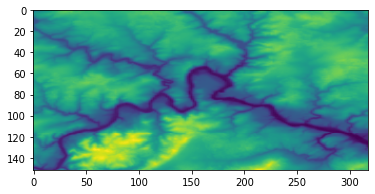

In [109]:
from matplotlib import pyplot
pyplot.imshow(srtm_array, cmap='viridis')
pyplot.show()

Mit einem Rasterband, das in ein Array eingekapselt ist, werden Kartenalgebra und die Analyse im Allgemeinen ziemlich einfach. Beispielsweise die Anwendung eines Hochpassfilter.
Dies ist ein typischer Vorgang in der digitalen Bildverarbeitung, der auch bei der Rasteranalyse Anwendung findet. Die Anwendung dieses beweglichen Fensters auf ein NumPy-Array erfordert Folgendes:

```
high_pass_array = np.full(srtm_array.shape, 0).astype(np.int16)

for i in range (1, srtm_array.shape[0] - 1):
    for j in range (1, srtm_array.shape[1] - 1):
        high_pass_array[i,j] = \
            srtm_array[i,j] * 4 - \
            srtm_array[i-1,j] - \
            srtm_array[i,j+1] - \
            srtm_array[i,j-1] - \
            srtm_array[i+1,j]
            
high_pass_array
```

In [110]:
high_pass_array = np.full(srtm_array.shape, 0).astype(np.int16)

for i in range (1, srtm_array.shape[0] - 1):
    for j in range (1, srtm_array.shape[1] - 1):
        high_pass_array[i,j] = \
            srtm_array[i,j] * 4 - \
            srtm_array[i-1,j] - \
            srtm_array[i,j+1] - \
            srtm_array[i,j-1] - \
            srtm_array[i+1,j]
            
high_pass_array

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, -12,  -5, ..., -15, -10,   0],
       [  0,   3,  12, ...,   7,  15,   0],
       ...,
       [  0, -59, -52, ...,   9,   6,   0],
       [  0, -30, -24, ...,   4,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int16)

Bevor das Ergebnis gespeichert wird, kann matplotlib noch einmal verwendet werden, um die Ergebnisse zu überprüfen:

```
pyplot.imshow(high_pass_array, cmap='seismic')
pyplot.show()
```

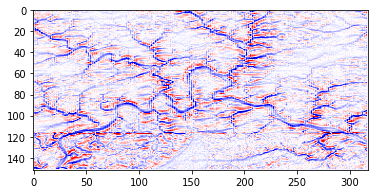

In [111]:
pyplot.imshow(high_pass_array, cmap='seismic')
pyplot.show()

Der Hochpassfilter hebt Übergänge hervor (die blauen und roten Zellen im obigen Raster). Da der Input ein DEM ist, zeigt der Hochpassfilter in diesem Fall die Zellen mit der größten Steigung an.

Dieses neue Raster ist immer noch nur ein Array. Um es als georeferenziertes Objekt zu speichern (oder allgemein zu verwenden), muss ein neues Dataset-Objekt erstellt werden. Dies kann mit der Methode open im Schreibmodus, d.h. mit dem Argument 'w', erfolgen:

```
high_pass = rasterio.open(
    '../Daten/srtm_high_pass.geotiff',
    'w',
    driver='GTiff',
    height=high_pass_array.shape[0],
    width=high_pass_array.shape[1],
    count=1,
    dtype=str(high_pass_array.dtype),
    crs=srtm.crs,
    transform=srtm.transform
)
```

In [112]:
high_pass = rasterio.open(
    'Data/srtm_high_pass.geotiff',
    'w',
    driver='GTiff',
    height=high_pass_array.shape[0],
    width=high_pass_array.shape[1],
    count=1,
    dtype=str(high_pass_array.dtype),
    crs=srtm.crs,
    transform=srtm.transform
)

Im Schreibmodus benötigt open einige weitere Informationen. Die Anzahl der Zeilen und Spalten sowie der Datentyp werden aus dem Array-Objekt selbst übergeben. Die CRS-Informationen werden aus dem ursprünglichen srtm-Objekt bezogen. Nur der Inhalt der Zellen im neuen Raster unterscheidet sich, die Position und Größe bleiben gleich.

open erstellte eine Verbindung zu einer neuen Rasterdatei und gibt ein Objekt vom Typ RasterUpdater zurück. Mit diesem Objekt kann der Inhalt des neuen Arrays in die Datei kopiert werden:

```
high_pass.write(high_pass_array, 1)
```

In [113]:
high_pass.write(high_pass_array, 1)

Die Schreibmethode nimmt als Argumente das NumPy-Array mit dem Zellinhalt und der Bandnummer im Raster. In diesem Fall wird 1 für die Bandnummer verwendet, da es nur eine Bandnummer gibt. Um die Datei abzuspeichern, wird die Close-Methode verwendet:

```
high_pass.close()
```

In [114]:
high_pass.close()

<div class="burk">
Als kleine Übung soll diese veränderte Datei nun noch mit Matplotlib ausgegeben werden.</div><i class="fa fa-lightbulb-o "></i>

318
152


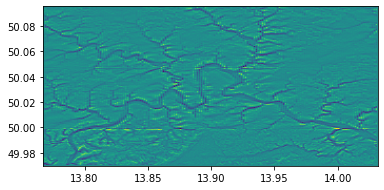

<AxesSubplot:>

In [115]:
import rasterio
highpassedimage = rasterio.open('Data/srtm_high_pass.geotiff')
print(highpassedimage.width)
print(highpassedimage.height)
%matplotlib inline
from rasterio import plot
plot.show(highpassedimage)

# Arbeiten mit PostgreSQL/PostGIS

Von Python aus kann sehr einfach eine Verbindung zu einer PostgreSQL Datenbank, ggf. mit dem PostGIS Zusatz hergestellt werden.
Dazu ist das Modul ```psycopg2``` notwendig.

Nach dem Import des Moduls durch den Befehl 
```
import psycopg2
```
kann die Verbindung aufgebaut werden mit einem ```connect``` Befehl:
```
connection = psycopg2.connect(dbname="dbname", host="hostname", 
                              user="username", password="passwort", port="5432")

```
Konnte die Verbindung erfolgreich erstellt werden, kann ein sog. Cursor Objekt erzeugt werden, welches der Ausführung von SQL Statements und damit der Abfrage oder Manipulation der Datenbank dient:
```
mycursor = connection.cursor().
```

Das gewünschte SQL-Statement wird i.d.R. als Textstringobjekt formuliert und anschliessend dem Cursorobjekt als Variable übergeben um ausgeführt zu werden:

```
sqlstmt="select gemnr,name, ST_Area(geom) as flaeche from pywsgembl limit 3;"
cursor.execute(sqlstmt)

```

Konnte das SQL Statement erfolgreich und ohne Fehler abgesetzt werden, kann durch das resultierende Ergebnisset mittels einer Schlaufe sequentiell durchgelaufen werden:

```
for gemnr,name,flaeche in cursor:
    print("Gemeinde %s (%i) ist %.3fm2 gross" %(name,gemnr,flaeche))

```
Dabei ist es wichtig, dass die Anzahl der Schlaufenvariablen der Anzahl der abgefragten Attribute entsprechen!

<div class="burk">
Nun sollen die einzelnen erläuterten Code-Teile zu einem ganzen zusammengefügt werden!</div><i class="fa fa-lightbulb-o "></i>

In [116]:
#import gdal
import psycopg2
#Connect to PostgreSQL 
connection = psycopg2.connect(dbname="postgis", host="ikgsql2.ethz.ch", 
                              user="postgres", password="tur4finupum9", port="5432")

#Query Database 
cursor = connection.cursor()

sqlstmt="select gemnr,name, ST_Area(geom) as flaeche from pywsgembl limit 3;"
cursor.execute(sqlstmt)

for gemnr,name,flaeche in cursor:
    print("Gemeinde %s (%i) ist %.3fm2 gross" %(name,gemnr,flaeche))



OperationalError: could not connect to server: Operation timed out
	Is the server running on host "ikgsql2.ethz.ch" (195.176.115.227) and accepting
	TCP/IP connections on port 5432?


In [ ]:
def analyzeGeometry(geometry, indent=0):
    s = []
    s.append("  " * indent)
    s.append(geometry.GetGeometryName())
    if geometry.GetPointCount() > 0:
        s.append(" mit %d Stuetzpunkten" % geometry.GetPointCount())
    if geometry.GetGeometryCount() > 0:
        s.append(" enthaelt:")

    print("".join(s))

    for i in range(geometry.GetGeometryCount()):
        analyzeGeometry(geometry.GetGeometryRef(i), indent+1)


#Query Database 
#firstLetter = input("Gib den ersten Buchstaben ein:")
sqlstring = "SELECT name, gemnr FROM bizgeogembl_orig LIMIT 10;"
sqlstring = "SELECT name, gemnr FROM bizgeogembl_orig ORDER BY name LIMIT 10;"
sqlstring = "SELECT name, gemnr FROM bizgeogembl_orig \
             WHERE name like '"+ firstLetter+  "%'     \
             ORDER BY name LIMIT 10;"

sqlstring = "SELECT name, gemnr,St_AsText(geom) FROM bizgeogembl_orig ORDER BY name LIMIT 1;"

sqlstring = "SELECT name, gemnr,round(st_area(geom)) AS dominic \
                FROM gemeinden_so \
                WHERE st_area(geom) > 5000000 \
                ORDER BY dominic;" 

cursor.execute(sqlstring)

print("Anzahl Datensätze: %i" %(cursor.rowcount))
print()

for nm, gnr, area in cursor:
    print ("Gem: %s, Nr: %s, Fläche: %s" %(nm, gnr, area))
    
    #mynewftrgeometry = ogr.CreateGeometryFromWkt(geometry)
    #analyzeGeometry(mynewftrgeometry)


Nebst der klassischen ```select``` Abfrageform können mittels SQL auch Datenmanipulationsbefehle wie bspw. ```update``` zur Nachführung von Daten abgesetzt werden:
```
sqlstring = "UPDATE gemeinden_so SET name = 'Aeschi' WHERE name = 'Äschi';"
cursor.execute(sqlstring)
```
Dabei ist wichtig, dass im Anschluss an die Ausführung zur Bestätigung ein sog. ```commit()``` Befehl abgesetzt wird, der vom Datenbankverbindungsobjekt unterstützt wird:
```
connection.commit()
```

<div class="burk">
Als Übung soll die Gemeinde "Äschi" auf "Aeschi" umbenannt werden.</div><i class="fa fa-lightbulb-o "></i>

In [ ]:

sqlstring = "UPDATE gemeinden_so SET name = 'Aeschi' WHERE name = 'Äschi';"
cursor.execute(sqlstring)
connection.commit()

Analog zum ```update``` Statement können auch neue Daten mittels ```insert``` Statement abgesezt bzw erzeugt werden.
Dies könnte bspw. mittels folgendem Befehl ausgeführt werden:
```
INSERT into gemeinden_so (id,name,gemnr,beznr,geom) \
VALUES (903,'Mustergemeinde3',9003,9003, \
ST_GeomFromText('MULTIPOLYGON(((637457.13 251335.3,637480.13 251345.3,637497.55 251351.17, \
637529.93 251377.62,637457.13 251335.3)))',21781));
```

In [ ]:
sqlstring ="INSERT into gemeinden_so (id,name,gemnr,beznr,geom) \
VALUES (903,'Mustergemeinde3',9003,9003, \
ST_GeomFromText('MULTIPOLYGON(((637457.13 251335.3,637480.13 251345.3,637497.55 251351.17, \
637529.93 251377.62,637457.13 251335.3)))',21781));"
cursor.execute(sqlstring)
connection.commit



## Import von Daten

Es liegt auf der Hand, dass somit auch Daten in die Datenbank selbst eingetragen werden können, dh. dass ein Import von mehreren Datensätzen über Python erfolgt. Dazu wird wiederum mit dem ```Import``` SQL Befehl gearbeitet. Zuerst muss ggf. allerdings die notwendige Tabelle in der entsprechenden Datenbank erstellt werden. Dies erfolgt mittels ``` create Table``` Befehl.
Mehr dazu kann unter https://www.w3schools.com/sql/sql_create_table.asp nachgelesen werden.

Die folgende Struktur einer Tabelle soll nun also in der bestehenden Datenbank erzeugt werden:

```
# -*- coding: utf-8 -*-
"""
Created on Thu Sept 2 2016

@author: Hans-Jörg Stark
"""

import psycopg2
import sys
import time
import ogr
startTime = time.time()

#Verbindung zur PostgreSQL DB 
connection = psycopg2.connect(dbname="dbname", host="hostname", user="username", password="password", port="5432")
cursor = connection.cursor()

cursor.execute("DROP TABLE IF EXISTS tablename;")
cursor.execute("drop index if exists nrIndex;")
cursor.execute("drop index if exists geomIndex;")

#Tabelle erstellen inkl. notwendiger Indices 
cursor.execute("""CREATE TABLE tablename (
                    id      SERIAL,
                    nummer      INTEGER,
                    name      CHARACTER VARYING(100),
                    PRIMARY KEY (id))
               """)
cursor.execute("CREATE INDEX nrIndex ON tablename(nummer)")
cursor.execute("SELECT AddGeometryColumn('tablename', 'geom', 21781, 'MULTIPOLYGON', 2)")
cursor.execute("CREATE INDEX geomIndex ON tablename USING GIST (geom)")
#WICHTIG: speichern der Transaktion!
connection.commit()
```

<div class="burk">
Als Übung sollen die Gemeindedaten von Solothurn in die PostgreSQL Datenbank importiert und in der Tabelle 'gemso' abgelegt werden.</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sept 2 2016

@author: Hans-Jörg Stark
"""

import psycopg2
import sys
import time
import ogr
startTime = time.time()

#Verbindung zur PostgreSQL DB 
connection = psycopg2.connect(dbname="bizgeo", host="localhost", user="postgres", password="postgres", port="5432")
cursor = connection.cursor()

cursor.execute("DROP TABLE IF EXISTS gemso;")
cursor.execute("drop index if exists gemnrIndex2;")
cursor.execute("drop index if exists geomIndex2;")

#Tabelle erstellen inkl. notwendiger Indices 
cursor.execute("""CREATE TABLE gemso (
                    id      SERIAL,
                    gemnr      INTEGER,
                    beznr      INTEGER,
                    name      CHARACTER VARYING(100),

                    PRIMARY KEY (id))
               """)
cursor.execute("CREATE INDEX gemnrIndex2 ON gemso(Gemnr)")
cursor.execute("SELECT AddGeometryColumn('gemso', 'geom', 21781, 'MULTIPOLYGON', 2)")
cursor.execute("CREATE INDEX geomIndex2 ON gemso USING GIST (geom)")
#WICHTIG: speichern der Transaktion!
connection.commit()

#######################
#import aller Datensaetze der Gemeinden von Solothurn
shapefile = ogr.Open("Daten/Gemeinden_Solothurn.shp")
if shapefile is None:
    print ("Datensatz konnte nicht geoeffnet werden.\n")
    sys.exit()

layer = shapefile.GetLayer(0)

#Extrahiere Gemeindegeometrie
gemgeometry = None
for feature in layer:
    #Extrahiere Gemeinde-Name 
    gemname = feature.GetField("gmde_name")
    print ("Gemeinde %s in Datenbank eingetragen." %gemname)
    #Extrahiere Gemeinde- und Bezirks-Nummer
    gemnr = int(feature.GetField("gmde_nr"))
    beznr = int(feature.GetField("bzrk_nr"))
    #Extrahiere Geometrie Polygon
    gemgeometry = feature.GetGeometryRef()
    gemgeometryaswkt = gemgeometry.ExportToWkt()
    sqlstring = "INSERT INTO gemso (name, gemnr, beznr, geom) VALUES ('%s', %s, %s, ST_MULTI(ST_GeomFromText('%s', 21781)))" %(gemname,gemnr,beznr,gemgeometryaswkt)
    print (sqlstring)
    cursor.execute(sqlstring)
    connection.commit()
endTime = time.time()
print ("Took %0.4f seconds" % (endTime-startTime))


# Aufruf Geowebdienste

Geowebdienste wie WMS und WFS können ebenso über Python aufgerufen und anschliessend die zurückerhaltenen Daten ausgewertet werden. Dazu müssen die entsprechenden URLs aufgerufen und verarbeitet werden. Im Folgenden werden je ein Beispiel für einen WMS und WFS Aufruf aufgeführt.

### WMS (WebMapService)

```
# -*- coding: utf-8 -*-

import os, shutil, sys
import urllib.request
import gdal
from gdalconst import *


def download(url, dest, fileName=None):
#based on:
#http://stackoverflow.com/questions/862173/how-to-download-a-file-using-python-in-a-smarter-way/863017#863017

    print("******")
    print(url)
    print("******")
    r= urllib.request.urlopen(url)

    fileName = os.path.join(dest, fileName)
    with open(fileName, 'wb') as f:
        shutil.copyfileobj(r,f)
    r.close()

if __name__=='__main__':

    wmsfile = "sogis.gif"
    if os.path.exists(wmsfile):
        os.remove(wmsfile)

    path2save2 = "" #Zielpfad
    wmslink = "http://geoweb.so.ch/wms/sogis_natgef.wms?service=wms&VERSION=1.3.0&REQUEST=GetMap&LAYERS=wassgef_01,steinschlag_01,rutsch_01&STYLES=&CRS=EPSG:21781&BBOX=605000,225000,612500,230000&WIDTH=720&HEIGHT=480&FORMAT=image/png"

    download(wmslink,path2save2,wmsfile)

    #Open Rasterfile
    fn = os.path.join(path2save2,wmsfile)
    ds = gdal.Open(fn, GA_ReadOnly)
    if ds is None:
        print('Could not open ' + fn)
        sys.exit(1)

    #check with gdalinfo
    os.system('gdalinfo %s' %fn)
```

In [126]:
# -*- coding: utf-8 -*-

import os, shutil, sys
import urllib.request
import gdal
from gdalconst import *


def download(url, dest, fileName=None):
#based on:
#http://stackoverflow.com/questions/862173/how-to-download-a-file-using-python-in-a-smarter-way/863017#863017

    print("******")
    print(url)
    print("******")
    r= urllib.request.urlopen(url)

    fileName = os.path.join(dest, fileName)
    with open(fileName, 'wb') as f:
        shutil.copyfileobj(r,f)
    r.close()

if __name__=='__main__':

    wmsfile = "sogis.gif"
    if os.path.exists(wmsfile):
        os.remove(wmsfile)

    path2save2 = "Daten/" #Zielpfad
    wmslink = "https://geo.so.ch/api/wms?SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&FORMAT=image%2Fpng&TRANSPARENT=true&LAYERS=ch.so.agi.hintergrundkarte_farbig&STYLES=&SRS=EPSG%3A2056&CRS=EPSG%3A2056&TILED=false&DPI=96&OPACITIES=255&t=675&WIDTH=1920&HEIGHT=710&BBOX=2607051.2375,1228517.0374999999,2608067.2375,1228892.7458333333"
    
    download(wmslink,path2save2,wmsfile)

    #Open Rasterfile
    fn = os.path.join(path2save2,wmsfile)
    ds = gdal.Open(fn, GA_ReadOnly)
    if ds is None:
        print('Could not open ' + fn)
        sys.exit(1)

    #check with gdalinfo
    os.system('gdalinfo %s' %fn)


ModuleNotFoundError: No module named 'gdal'

### WFS (WebFeatureService)

```
# -*- coding: utf-8 -*-
import os, sys, shutil
import urllib.request
import ogr
import gdal
from gdalconst import *

#WFS Daten von:
#http://www.are.zh.ch/internet/baudirektion/are/de/geoinformation/geodienste_uebersicht/WebFeatureService.html

def download(url, dest, fileName=None):
#based on: 
#http://stackoverflow.com/questions/862173/how-to-download-a-file-using-python-in-a-smarter-way/863017#863017
    print("******")
    print ("Start downloading of %s" %url)
    print("******")

    r= urllib.request.urlopen(url)

    try:
        fileName = os.path.join(dest, fileName)
        with open(fileName, 'wb') as f:
            shutil.copyfileobj(r,f)
        print ("Saved in %s" %fileName)
    finally:
        r.close()
        
def convert2shp(path2save2,wfsfile,outputshapefile):
    fn = os.path.join(path2save2,wfsfile)
    
    driver = ogr.GetDriverByName('ESRI Shapefile')
    if os.path.exists(outputshapefile):
        driver.DeleteDataSource(outputshapefile) 
    
    #convert GMLfile to shape - if needed...
    ogr2ogrstring = 'ogr2ogr -f "ESRI Shapefile" %s %s' %(outputshapefile,fn)
    print (ogr2ogrstring)
    os.system(ogr2ogrstring)
    print ("Conversion successful...")
    
    #... oder GML... 
    wfsfile = ogr.Open(fn)
    if wfsfile is None:
        print ("Datensatz konnte nicht geoeffnet werden.\n")
        sys.exit( 1 )
    
    layer = wfsfile.GetLayer(0)
    lname = layer.GetName()
    
    print ("Layername: ", lname)
    
    #Print out number of records:
    numftrs = layer.GetFeatureCount()
    print ("Anzahl Features in GML Datei: %d" %numftrs)
    print ("")
    
    print ("Count Field Count", layer.GetLayerDefn().GetFieldCount())	
    for feat in range(numftrs):
        for i in range(layer.GetLayerDefn().GetFieldCount()):
            field_defn = layer.GetLayerDefn().GetFieldDefn(i)
        try:
            print ("  %s: %s" %(field_defn.GetName(), layer.GetFeature(feat).GetField(i)))
        except:
            pass
        print() 
    
    
    #Get Extent
    extent = layer.GetExtent()
    print ("Ausdehnung:", extent)
    print ("Oben-links:", extent[0], extent[3])
    print ("Unten-rechts:", extent[1], extent[2])


if __name__=='__main__':

    ######################   
    #Punktdaten:     
    wfsfile = "testpoints.gml"
    outputshapefile = 'wfstestpoints.shp'
    path2save2 = ""
    wfsurl = "http://maps.zh.ch/wfs/HaltestellenZHWFS?SERVICE=WFS&VERSION=1.1.0&Request=getfeature&TYPENAME=haltestellen&MAXFEATURES=30"
    download(wfsurl,path2save2 ,wfsfile)
    
    convert2shp(path2save2,wfsfile,outputshapefile)

    #Liniendaten:     
    wfsfile = "testlines.gml"
    outputshapefile = 'wfstestlines.shp'
    path2save2 = ""
    wfsurl = "http://maps.zh.ch/wfs/GemZHWFS?SERVICE=WFS&VERSION=1.1.0&Request=getfeature&TYPENAME=grenzen&MAXFEATURES=100"

    download(wfsurl,path2save2 ,wfsfile)
    convert2shp(path2save2,wfsfile,outputshapefile)
```

In [ ]:
# -*- coding: utf-8 -*-
import os, sys, shutil
import urllib.request
import ogr
import gdal
from gdalconst import *

#WFS Daten von:
#http://www.are.zh.ch/internet/baudirektion/are/de/geoinformation/geodienste_uebersicht/WebFeatureService.html

def download(url, dest, fileName=None):
#based on: 
#http://stackoverflow.com/questions/862173/how-to-download-a-file-using-python-in-a-smarter-way/863017#863017
    print("******")
    print ("Start downloading of %s" %url)
    print("******")

    r= urllib.request.urlopen(url)

    try:
        fileName = os.path.join(dest, fileName)
        with open(fileName, 'wb') as f:
            shutil.copyfileobj(r,f)
        print ("Saved in %s" %fileName)
    finally:
        r.close()
        
def convert2shp(path2save2,wfsfile,outputshapefile):
    fn = os.path.join(path2save2,wfsfile)
    
    driver = ogr.GetDriverByName('ESRI Shapefile')
    if os.path.exists(outputshapefile):
        driver.DeleteDataSource(outputshapefile) 
    
    #convert GMLfile to shape - if needed...
    ogr2ogrstring = 'ogr2ogr -f "ESRI Shapefile" %s %s' %(outputshapefile,fn)
    print (ogr2ogrstring)
    os.system(ogr2ogrstring)
    print ("Conversion successful...")
    
    #... oder GML... 
    wfsfile = ogr.Open(fn)
    if wfsfile is None:
        print ("Datensatz konnte nicht geoeffnet werden.\n")
        sys.exit( 1 )
    
    layer = wfsfile.GetLayer(0)
    lname = layer.GetName()
    
    print ("Layername: ", lname)
    
    #Print out number of records:
    numftrs = layer.GetFeatureCount()
    print ("Anzahl Features in GML Datei: %d" %numftrs)
    print ("")
    
    print ("Count Field Count", layer.GetLayerDefn().GetFieldCount())	
    for feat in range(numftrs):
        for i in range(layer.GetLayerDefn().GetFieldCount()):
            field_defn = layer.GetLayerDefn().GetFieldDefn(i)
        try:
            print ("  %s: %s" %(field_defn.GetName(), layer.GetFeature(feat).GetField(i)))
        except:
            pass
        print() 
    
    
    #Get Extent
    extent = layer.GetExtent()
    print ("Ausdehnung:", extent)
    print ("Oben-links:", extent[0], extent[3])
    print ("Unten-rechts:", extent[1], extent[2])


if __name__=='__main__':

    ######################   
    #Punktdaten:     
    wfsfile = "testpoints.gml"
    outputshapefile = 'wfstestpoints.shp'
    path2save2 = ""
    wfsurl = "http://maps.zh.ch/wfs/HaltestellenZHWFS?SERVICE=WFS&VERSION=1.1.0&Request=getfeature&TYPENAME=haltestellen&MAXFEATURES=30"
    download(wfsurl,path2save2 ,wfsfile)
    
    convert2shp(path2save2,wfsfile,outputshapefile)

    #Liniendaten:     
    wfsfile = "testlines.gml"
    outputshapefile = 'wfstestlines.shp'
    path2save2 = ""
    wfsurl = "http://maps.zh.ch/wfs/GemZHWFS?SERVICE=WFS&VERSION=1.1.0&Request=getfeature&TYPENAME=grenzen&MAXFEATURES=100"

    download(wfsurl,path2save2 ,wfsfile)
    convert2shp(path2save2,wfsfile,outputshapefile)
